In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from collections import defaultdict
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.rcParams['figure.dpi']= 300  #resolution


# Data Preparation

In [2]:
df=pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/datatraining.txt')
df['date'] =  pd.to_datetime(df['date'], format = '%Y-%m-%d %H:%M:%S')
df.sort_values('date', inplace = True)
df.reset_index(inplace = True, drop = True)


test = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/datatest.txt')
test['date'] =  pd.to_datetime(test['date'], format = '%Y-%m-%d %H:%M:%S')
test.sort_values('date', inplace = True)
test.reset_index(inplace = True, drop = True)

test2 = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/datatest2.txt')
test2['date'] =  pd.to_datetime(test2['date'], format = '%Y-%m-%d %H:%M:%S')
test2.sort_values('date', inplace = True)
test2.reset_index(inplace = True, drop = True)

print(df.head())
print(df.tail()) 



print(test.head())# non me ne faccio praticamente un czzo del test set, ci son cinque ore di buco tra il training ed i test 
print(test.tail())

print(test2.head()) 
print(test2.tail())

                 date  Temperature  Humidity  Light     CO2  HumidityRatio  \
0 2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
1 2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
2 2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
3 2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
4 2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
0          1  
1          1  
2          1  
3          1  
4          1  
                    date  Temperature  Humidity  Light         CO2  \
8138 2015-02-10 09:29:00        21.05   36.0975  433.0  787.250000   
8139 2015-02-10 09:29:59        21.05   35.9950  433.0  789.500000   
8140 2015-02-10 09:30:59        21.10   36.0950  433.0  798.500000   
8141 2015-02-10 09:32:00        21.10   36.2600  433.0  820.333333   
8142 2015-02-10 09:33:00        21.10   36.2000  447.0  821.000000   

      HumidityRatio 

In [3]:
print(len(df))
print(( 24*60-17*60 -51)+ 60 *24*5+ (9*60+33)) #ho un dato per ogni minuto, posso creare un indice minuto per minuto
index = pd.date_range(start=df['date'][0], end=df['date'][len(df)-1], freq='min')
index

8143
8142


DatetimeIndex(['2015-02-04 17:51:00', '2015-02-04 17:52:00',
               '2015-02-04 17:53:00', '2015-02-04 17:54:00',
               '2015-02-04 17:55:00', '2015-02-04 17:56:00',
               '2015-02-04 17:57:00', '2015-02-04 17:58:00',
               '2015-02-04 17:59:00', '2015-02-04 18:00:00',
               ...
               '2015-02-10 09:24:00', '2015-02-10 09:25:00',
               '2015-02-10 09:26:00', '2015-02-10 09:27:00',
               '2015-02-10 09:28:00', '2015-02-10 09:29:00',
               '2015-02-10 09:30:00', '2015-02-10 09:31:00',
               '2015-02-10 09:32:00', '2015-02-10 09:33:00'],
              dtype='datetime64[ns]', length=8143, freq='T')

In [4]:
print(len(test2))
print(( 24*60-14*60 -48)+ 60 *24*6+ (9*60+19)) #ho un dato per ogni minuto, posso creare un indice minuto per minuto
index = pd.date_range(start=test2['date'][0], end=test2['date'][len(test2)-1], freq='min')
index

9752
9751


DatetimeIndex(['2015-02-11 14:48:00', '2015-02-11 14:49:00',
               '2015-02-11 14:50:00', '2015-02-11 14:51:00',
               '2015-02-11 14:52:00', '2015-02-11 14:53:00',
               '2015-02-11 14:54:00', '2015-02-11 14:55:00',
               '2015-02-11 14:56:00', '2015-02-11 14:57:00',
               ...
               '2015-02-18 09:10:00', '2015-02-18 09:11:00',
               '2015-02-18 09:12:00', '2015-02-18 09:13:00',
               '2015-02-18 09:14:00', '2015-02-18 09:15:00',
               '2015-02-18 09:16:00', '2015-02-18 09:17:00',
               '2015-02-18 09:18:00', '2015-02-18 09:19:00'],
              dtype='datetime64[ns]', length=9752, freq='T')

In [5]:
test2 = test2[test2['date'] < '2015-02-18 00:00:00']
test2 = test2[test2['date'] > '2015-02-11 23:59:59']

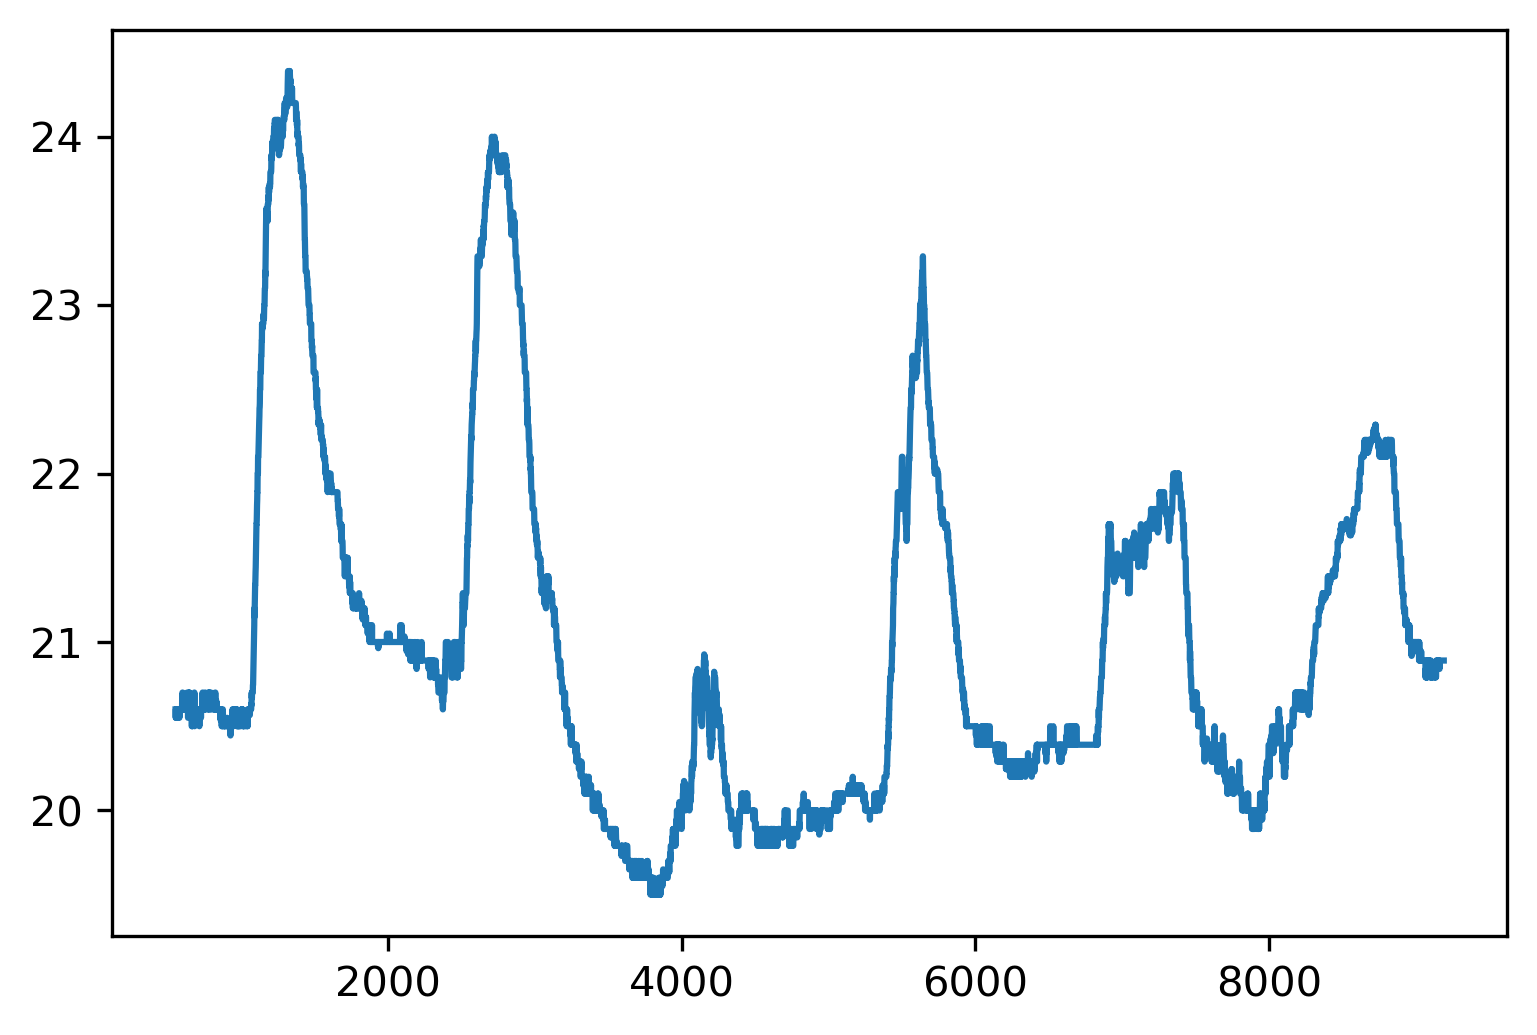

552     20.60
553     20.55
554     20.60
555     20.60
556     20.60
        ...  
9187    20.89
9188    20.89
9189    20.89
9190    20.89
9191    20.89
Name: Temperature, Length: 8640, dtype: float64

In [6]:
ts = test2['Temperature']
plt.plot(ts)
plt.show()
ts

In [7]:
test2.reset_index(inplace = True, drop = True)
index = pd.date_range(start='2015-02-12 00:00:00', end='2015-02-17 23:59:00' , freq='min')
index

DatetimeIndex(['2015-02-12 00:00:00', '2015-02-12 00:01:00',
               '2015-02-12 00:02:00', '2015-02-12 00:03:00',
               '2015-02-12 00:04:00', '2015-02-12 00:05:00',
               '2015-02-12 00:06:00', '2015-02-12 00:07:00',
               '2015-02-12 00:08:00', '2015-02-12 00:09:00',
               ...
               '2015-02-17 23:50:00', '2015-02-17 23:51:00',
               '2015-02-17 23:52:00', '2015-02-17 23:53:00',
               '2015-02-17 23:54:00', '2015-02-17 23:55:00',
               '2015-02-17 23:56:00', '2015-02-17 23:57:00',
               '2015-02-17 23:58:00', '2015-02-17 23:59:00'],
              dtype='datetime64[ns]', length=8640, freq='T')

In [8]:
test2

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-12 00:00:00,20.60,26.650000,0.0,508.000000,0.003996,0
1,2015-02-12 00:01:00,20.55,26.850000,0.0,505.500000,0.004014,0
2,2015-02-12 00:02:00,20.60,26.800000,0.0,502.333333,0.004019,0
3,2015-02-12 00:03:00,20.60,27.166667,0.0,500.000000,0.004074,0
4,2015-02-12 00:04:00,20.60,26.890000,0.0,498.000000,0.004032,0
...,...,...,...,...,...,...,...
8635,2015-02-17 23:55:00,20.89,29.600000,0.0,1201.000000,0.004522,0
8636,2015-02-17 23:55:59,20.89,29.550000,0.0,1196.000000,0.004514,0
8637,2015-02-17 23:57:00,20.89,29.525000,0.0,1194.000000,0.004511,0
8638,2015-02-17 23:57:59,20.89,29.500000,0.0,1203.000000,0.004507,0


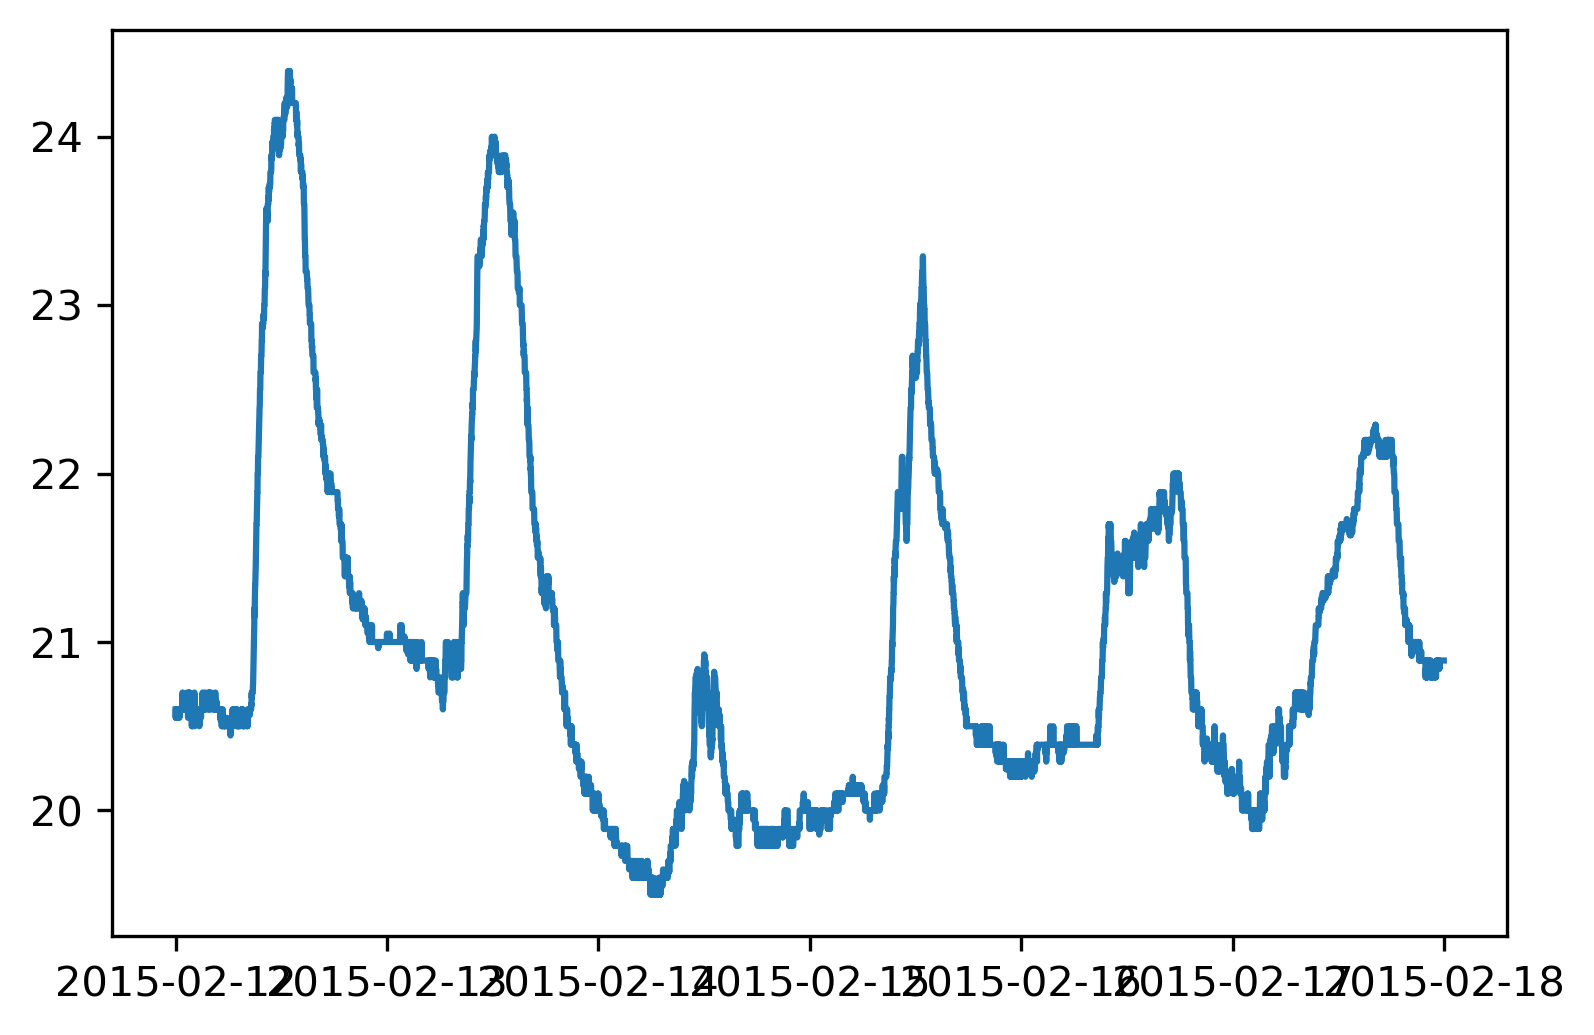

In [9]:
ts = pd.Series(ts.values, index)
plt.plot(ts)

plt.show()

### Log Tranformation

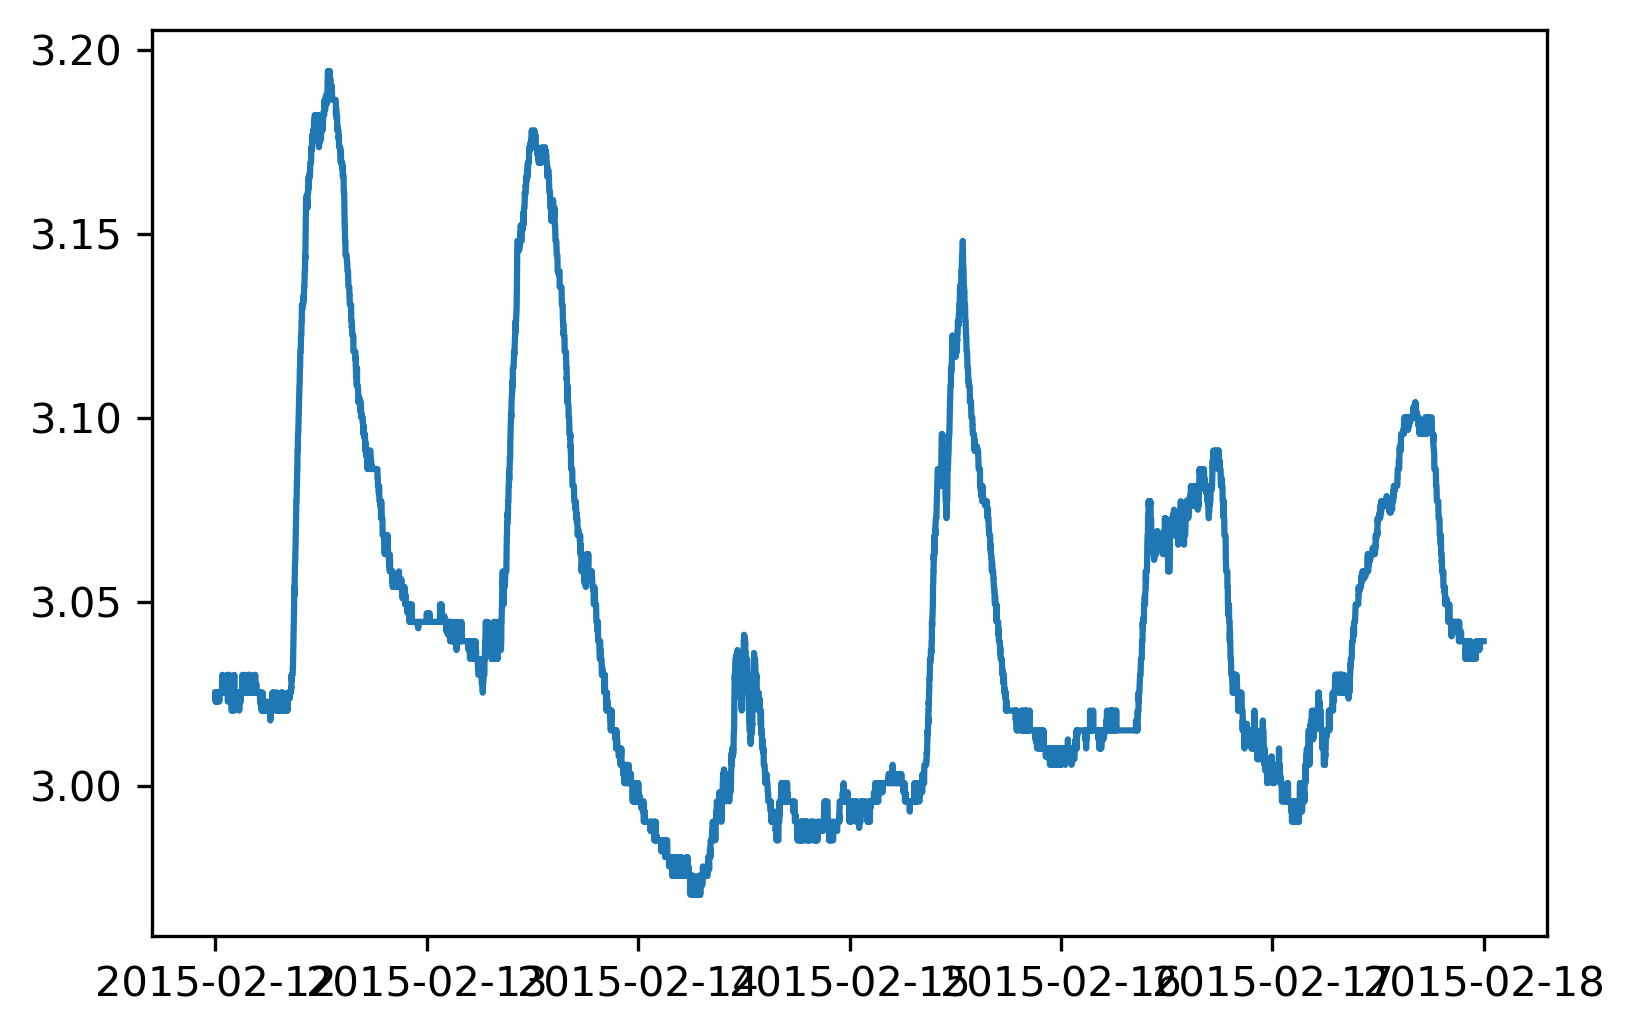

In [10]:
ts_log = pd.Series(np.log(ts), index=ts.index)
plt.plot(ts_log)
plt.show()

### Diff Tranformation

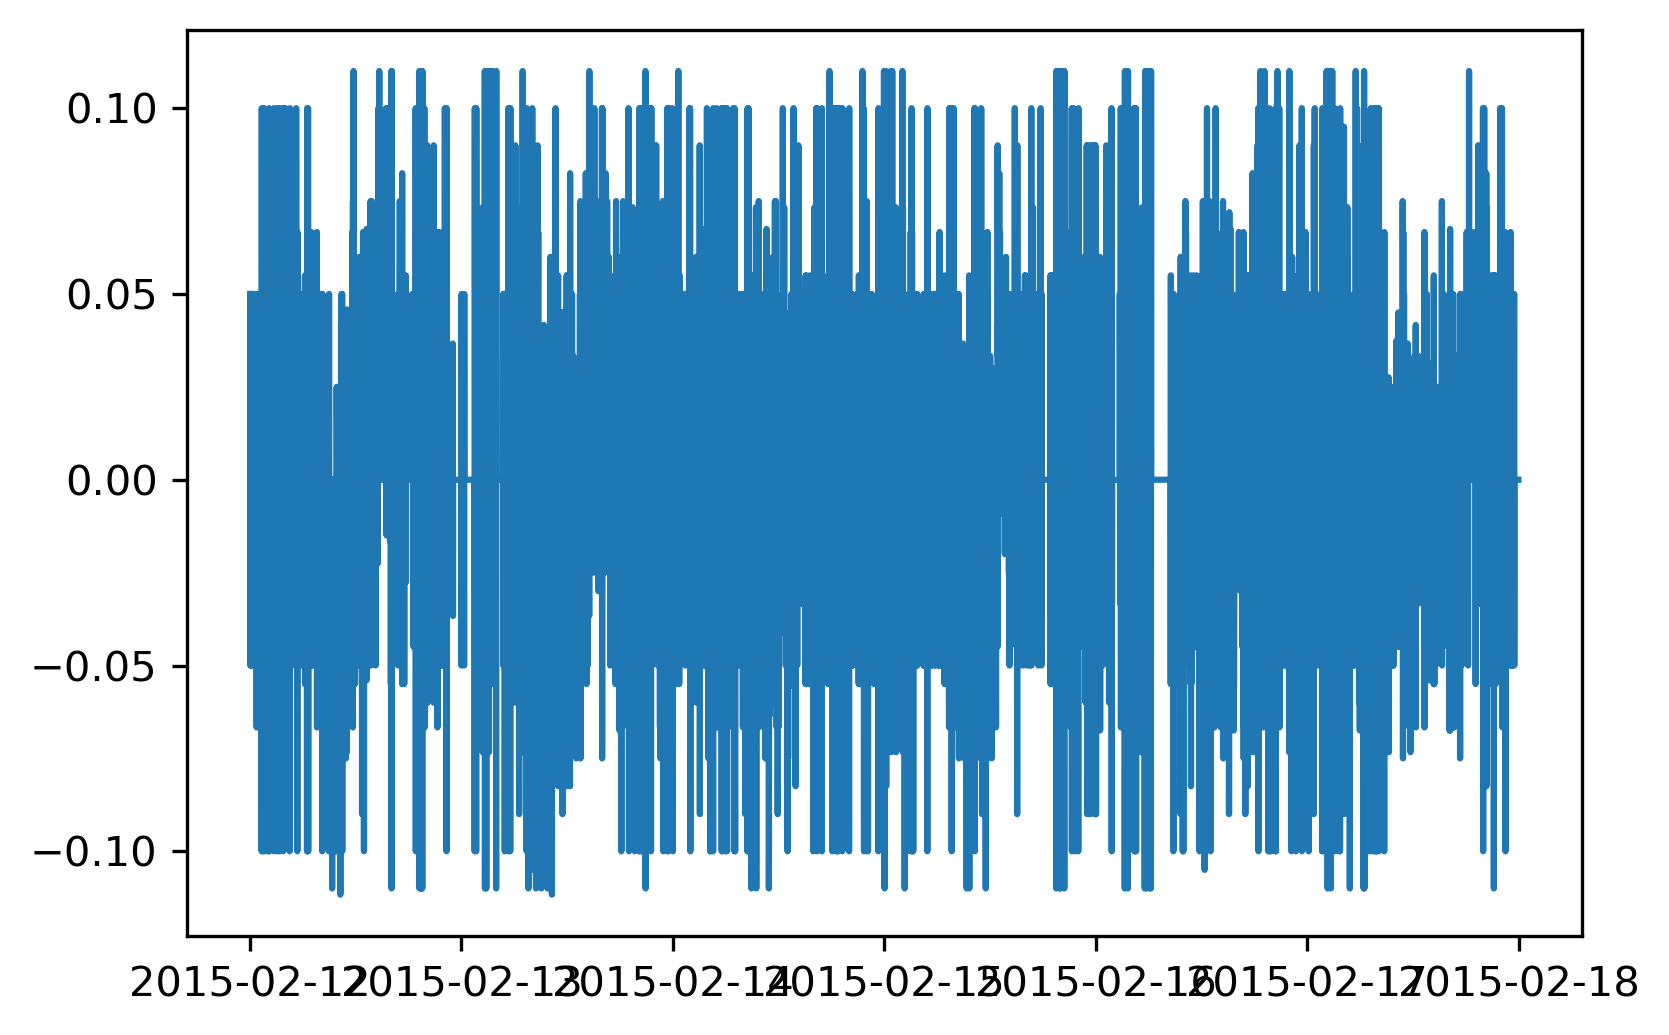

In [11]:
ts_diff = pd.Series(ts[:-1].values - ts[1:].values, index=ts.index[1:])
plt.plot(ts_diff)
plt.show() #riesci a capire di quanto varia rispetto al record precedetne

### Log Mean Diff Tranformation

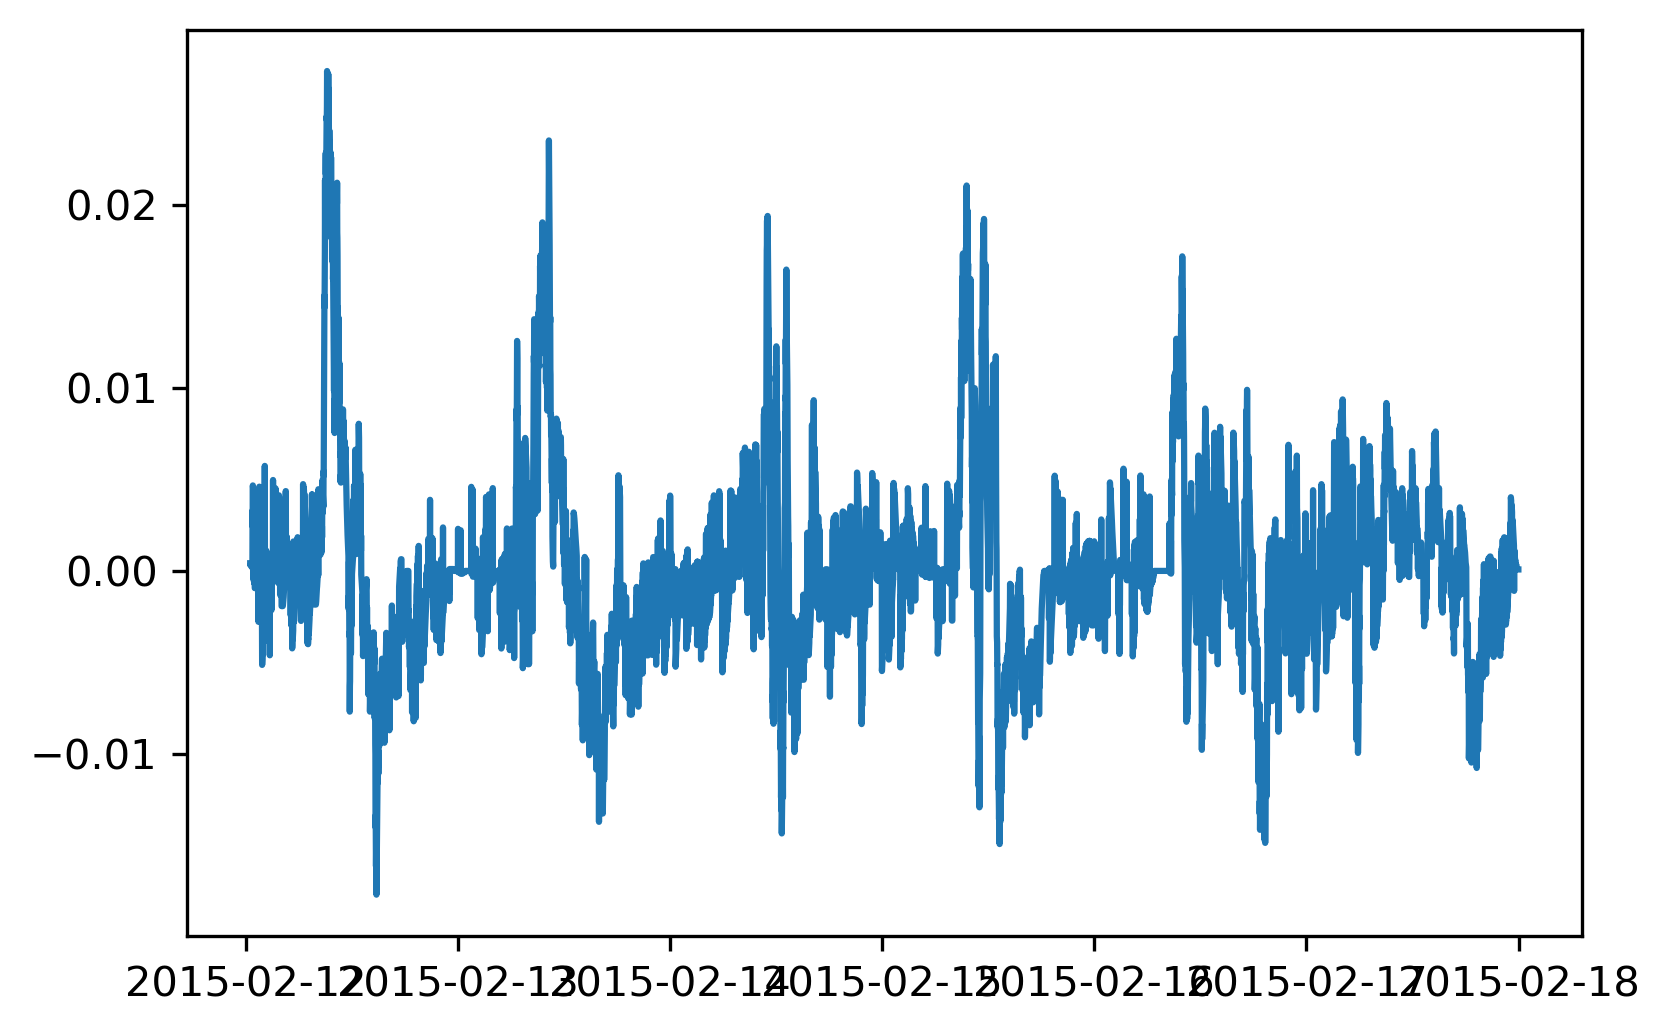

In [12]:
window = 30

ts_log_mov_diff = pd.Series(ts_log - ts_log.rolling(window, center=False).mean(), index=ts.index)
plt.plot(ts_log_mov_diff)
plt.show()

### Autocorrelation and Partial Autocorrelation

In [13]:
from statsmodels.tsa.stattools import acf, pacf

In [14]:
lag_acf = acf(ts, nlags=20)
lag_pacf = pacf(ts, nlags=20, method='ols')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


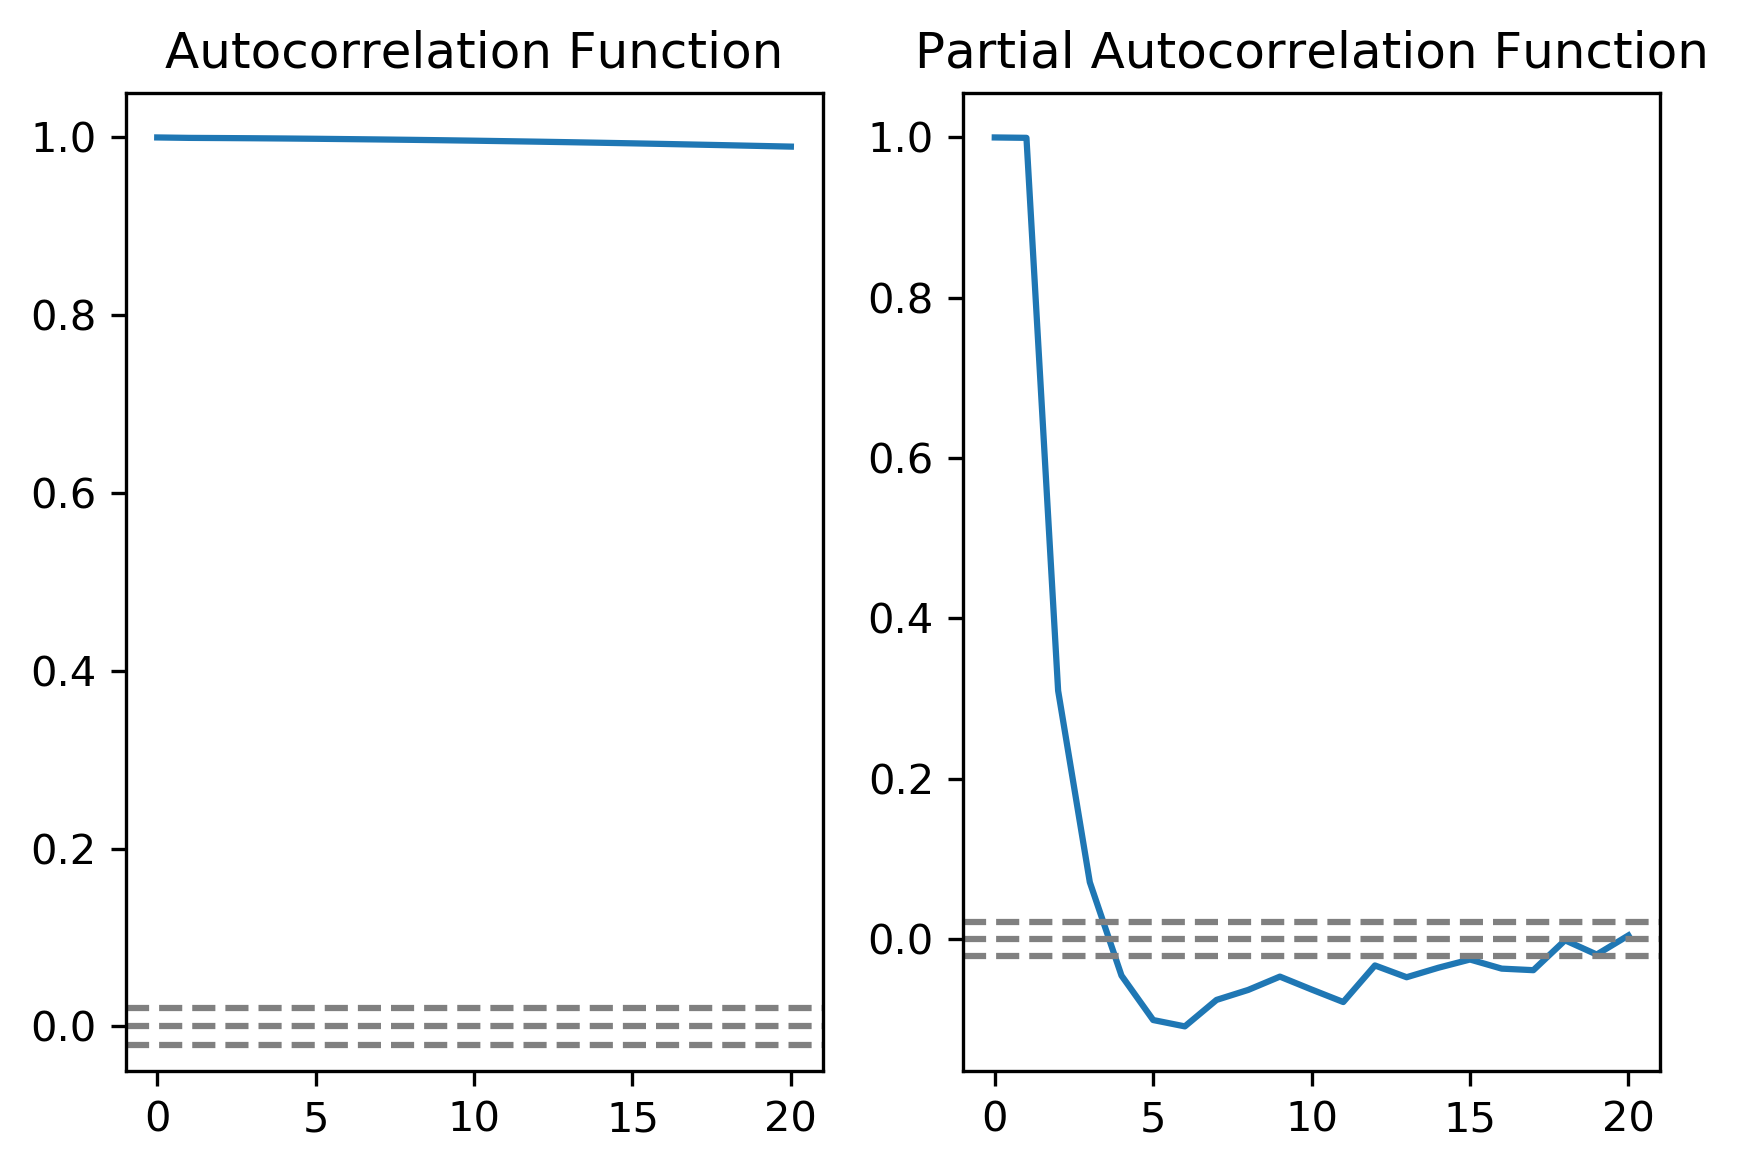

In [15]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


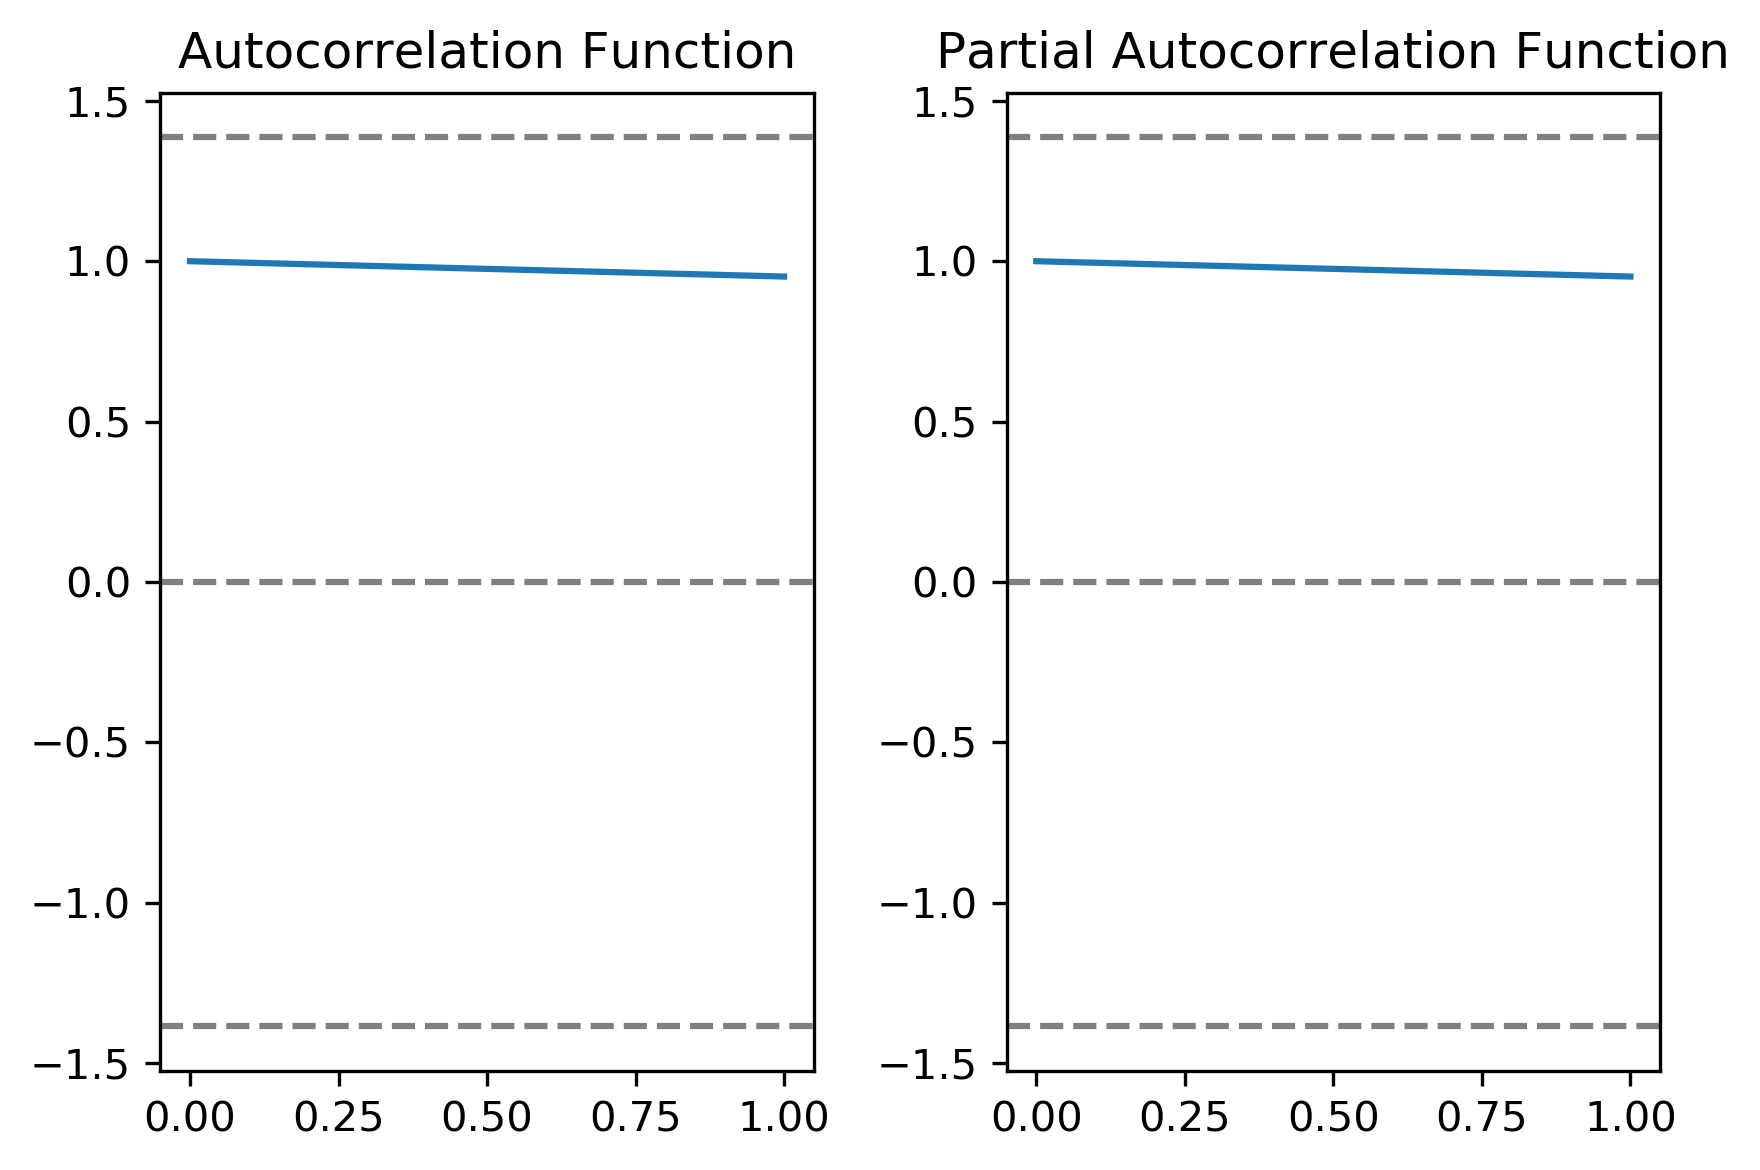

In [16]:
lag_acf = acf(ts_log_mov_diff.values[29:], nlags=1)
lag_pacf = pacf(ts_log_mov_diff[29:], nlags=1, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

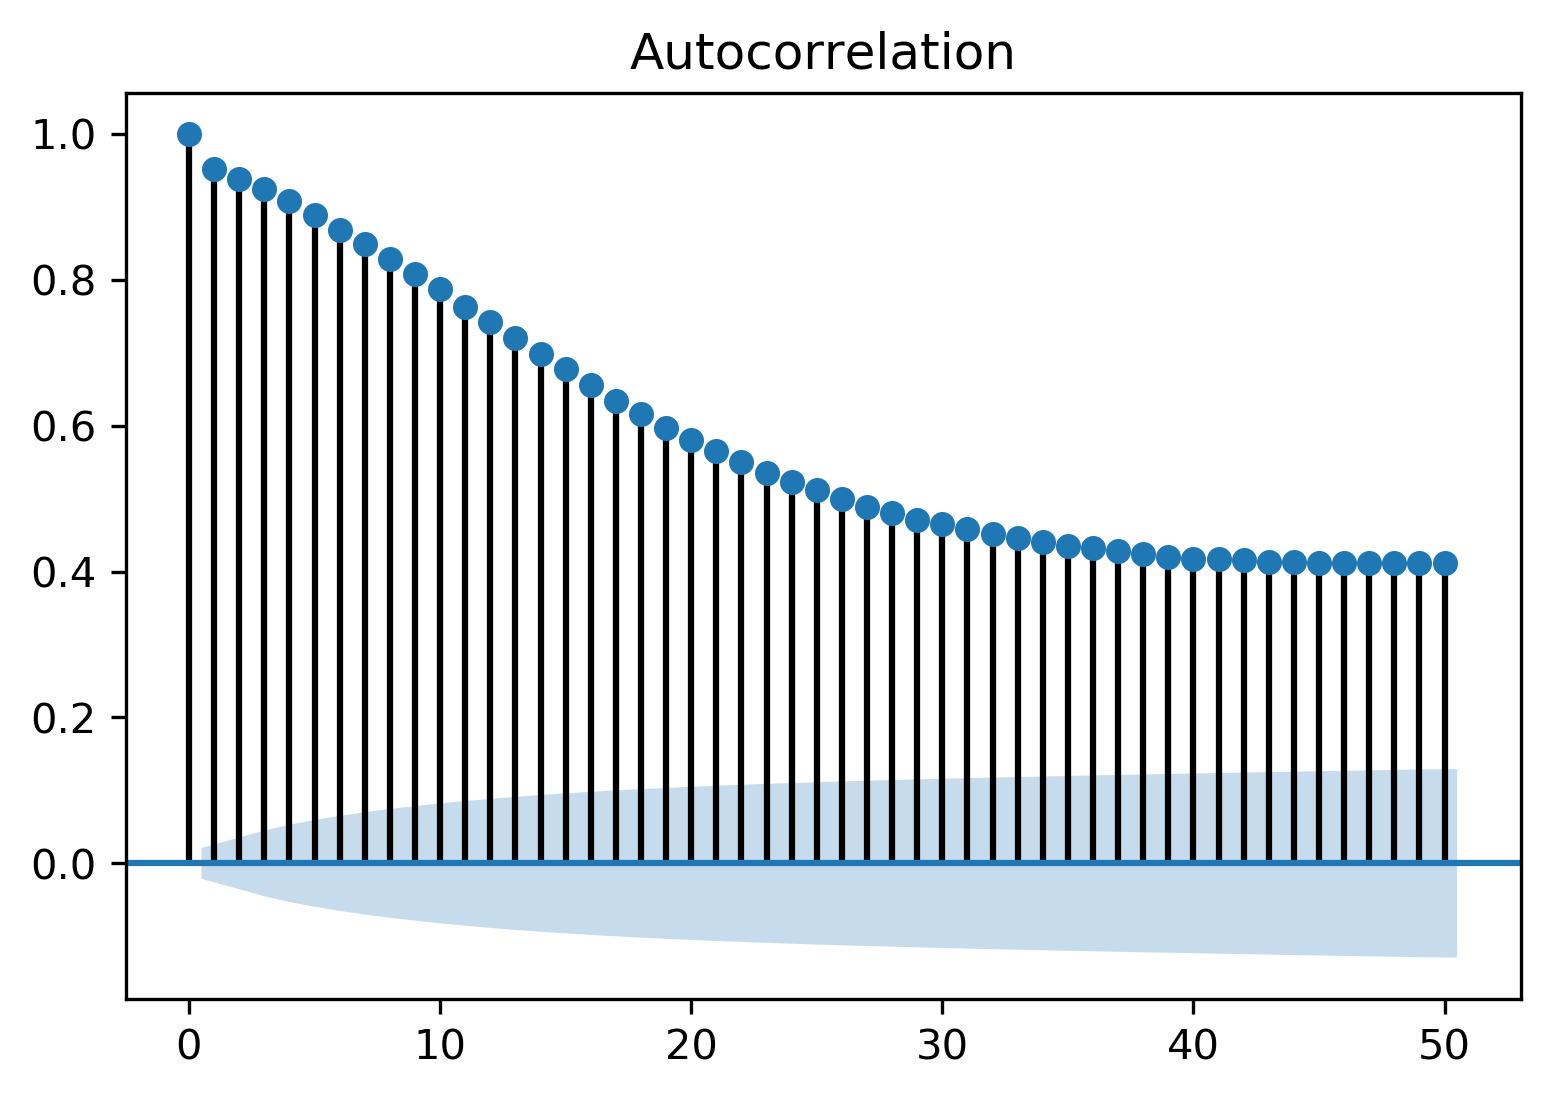

In [18]:
plot_acf(ts_log_mov_diff.values[29:], lags=50)
plt.show()

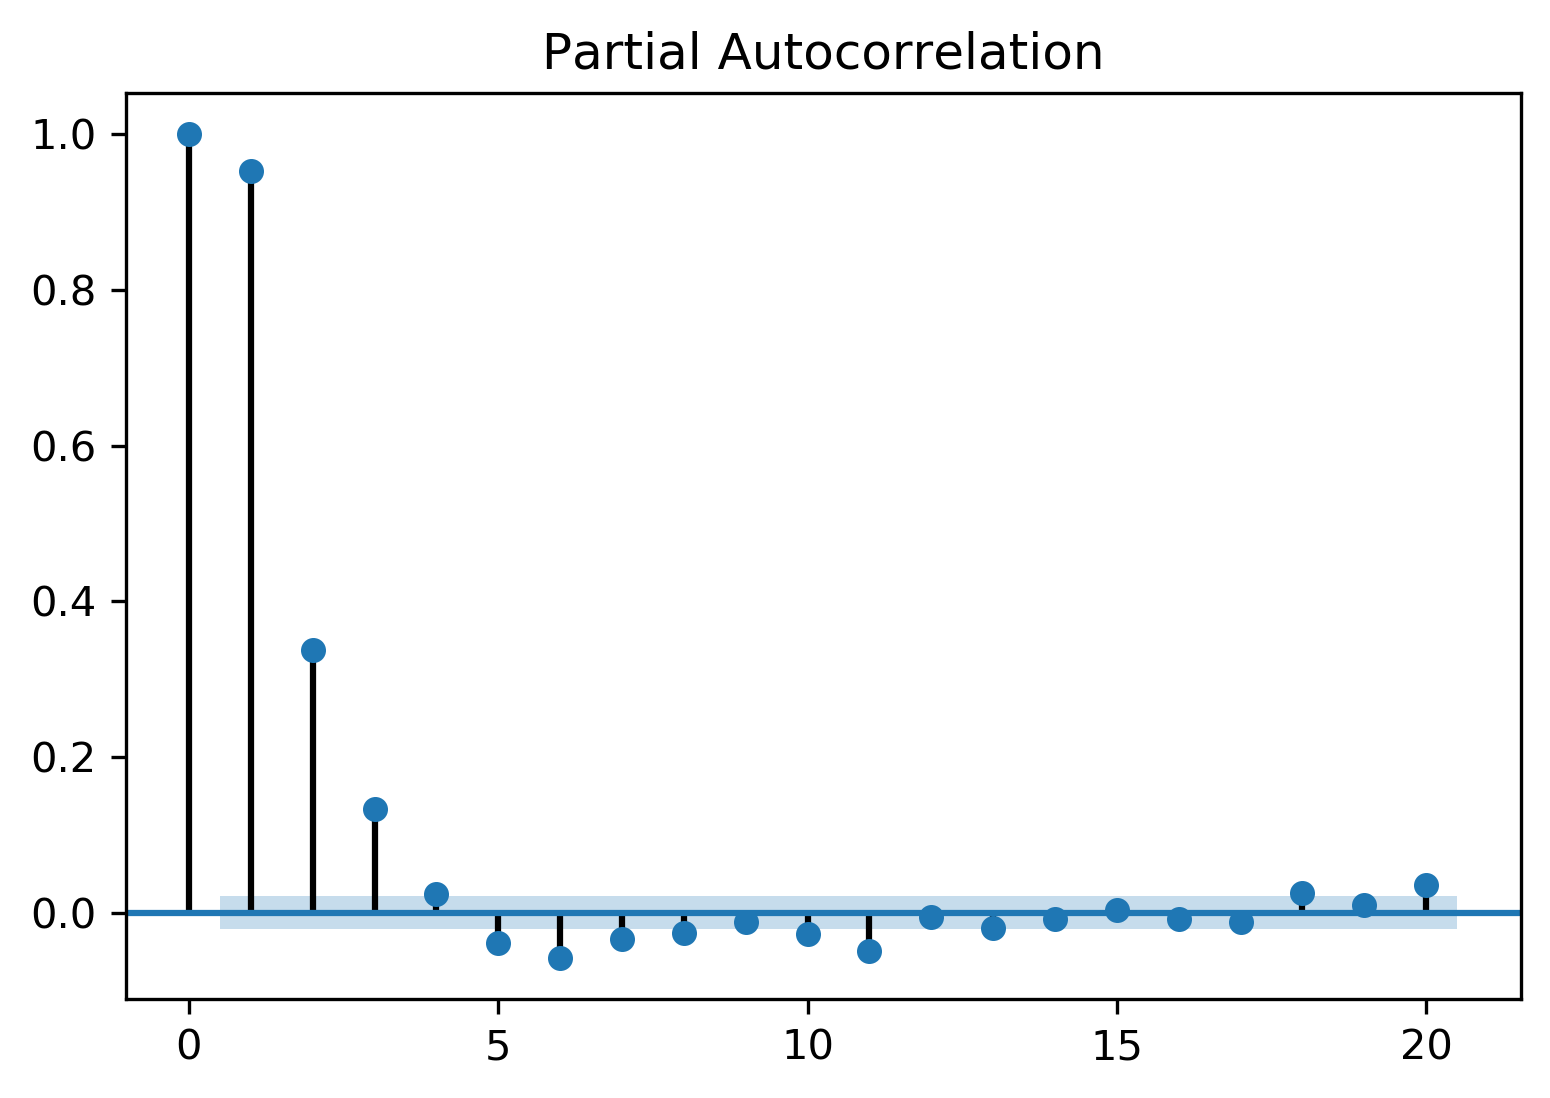

In [19]:
plot_pacf(ts_log_mov_diff.values[29:], lags=20)
plt.show()

### Stationarity 
The Augmented Dickey-Fuller unit root test (http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html).
Estimates whether the time series has a time-dependent structure (non-stationary, i.e. affected by trend, seasonality and other phenomena that make the statistics of the time series to vary in time) or not (stationary), which are related to (though quite different from) periodicity and autocorrelation.

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
dftest = adfuller(ts, autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -2.804057
p-value                           0.057697
#Lags Used                       31.000000
Number of Observations Used    8608.000000
Critical Value (1%)              -3.431110
Critical Value (5%)              -2.861876
Critical Value (10%)             -2.566949
dtype: float64


In [22]:
dftest = adfuller(ts_log, autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -2.747723
p-value                           0.066138
#Lags Used                       31.000000
Number of Observations Used    8608.000000
Critical Value (1%)              -3.431110
Critical Value (5%)              -2.861876
Critical Value (10%)             -2.566949
dtype: float64


In [23]:
dftest = adfuller(ts_log_mov_diff.values[29:], autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.883220e+00
p-value                        4.642763e-12
#Lags Used                     2.900000e+01
Number of Observations Used    8.581000e+03
Critical Value (1%)           -3.431112e+00
Critical Value (5%)           -2.861877e+00
Critical Value (10%)          -2.566949e+00
dtype: float64


### Decomposition

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
ts = pd.Series(ts.values, index)

In [26]:
tsx =ts.copy()
todrop = [i for i in tsx.index if i.day<12 or i.day >= 18]
tsx.drop(todrop, inplace =True)
tsx

2015-02-12 00:00:00    20.60
2015-02-12 00:01:00    20.55
2015-02-12 00:02:00    20.60
2015-02-12 00:03:00    20.60
2015-02-12 00:04:00    20.60
                       ...  
2015-02-17 23:55:00    20.89
2015-02-17 23:56:00    20.89
2015-02-17 23:57:00    20.89
2015-02-17 23:58:00    20.89
2015-02-17 23:59:00    20.89
Freq: T, Length: 8640, dtype: float64

In [27]:
help(seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series. Must be used if x is not a pandas object or if
        the index of x does not have  a frequency. Overrides default
        periodicity of x if x is a pandas object with a timeseries index.
    two_sided : bool, optional
        The moving a

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


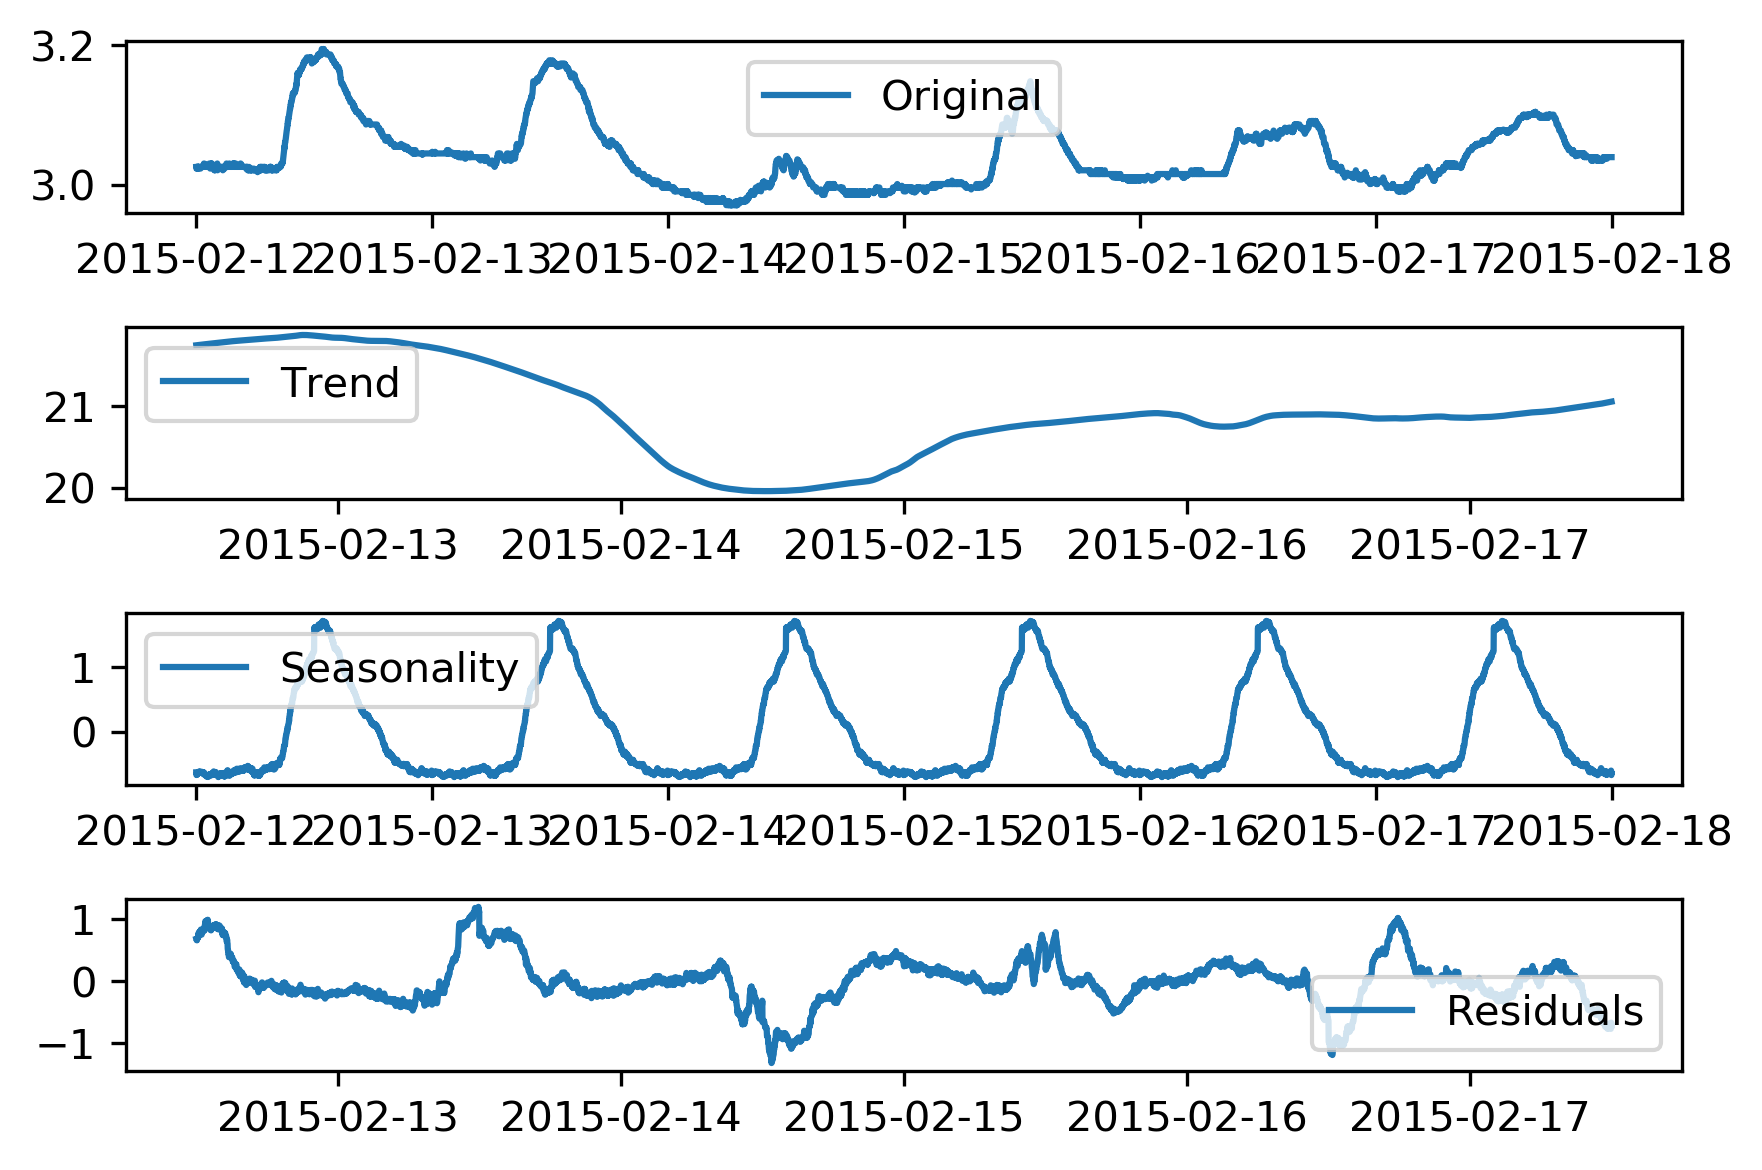

In [28]:

decomposition = seasonal_decompose(ts, freq = (len(ts))//6)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [29]:
residual.describe()

count    7200.000000
mean        0.001938
std         0.392631
min        -1.322889
25%        -0.192472
50%        -0.007614
75%         0.185552
max         1.201325
Name: resid, dtype: float64

In [30]:
residual

2015-02-12 00:00:00   NaN
2015-02-12 00:01:00   NaN
2015-02-12 00:02:00   NaN
2015-02-12 00:03:00   NaN
2015-02-12 00:04:00   NaN
                       ..
2015-02-17 23:55:00   NaN
2015-02-17 23:56:00   NaN
2015-02-17 23:57:00   NaN
2015-02-17 23:58:00   NaN
2015-02-17 23:59:00   NaN
Freq: T, Name: resid, Length: 8640, dtype: float64

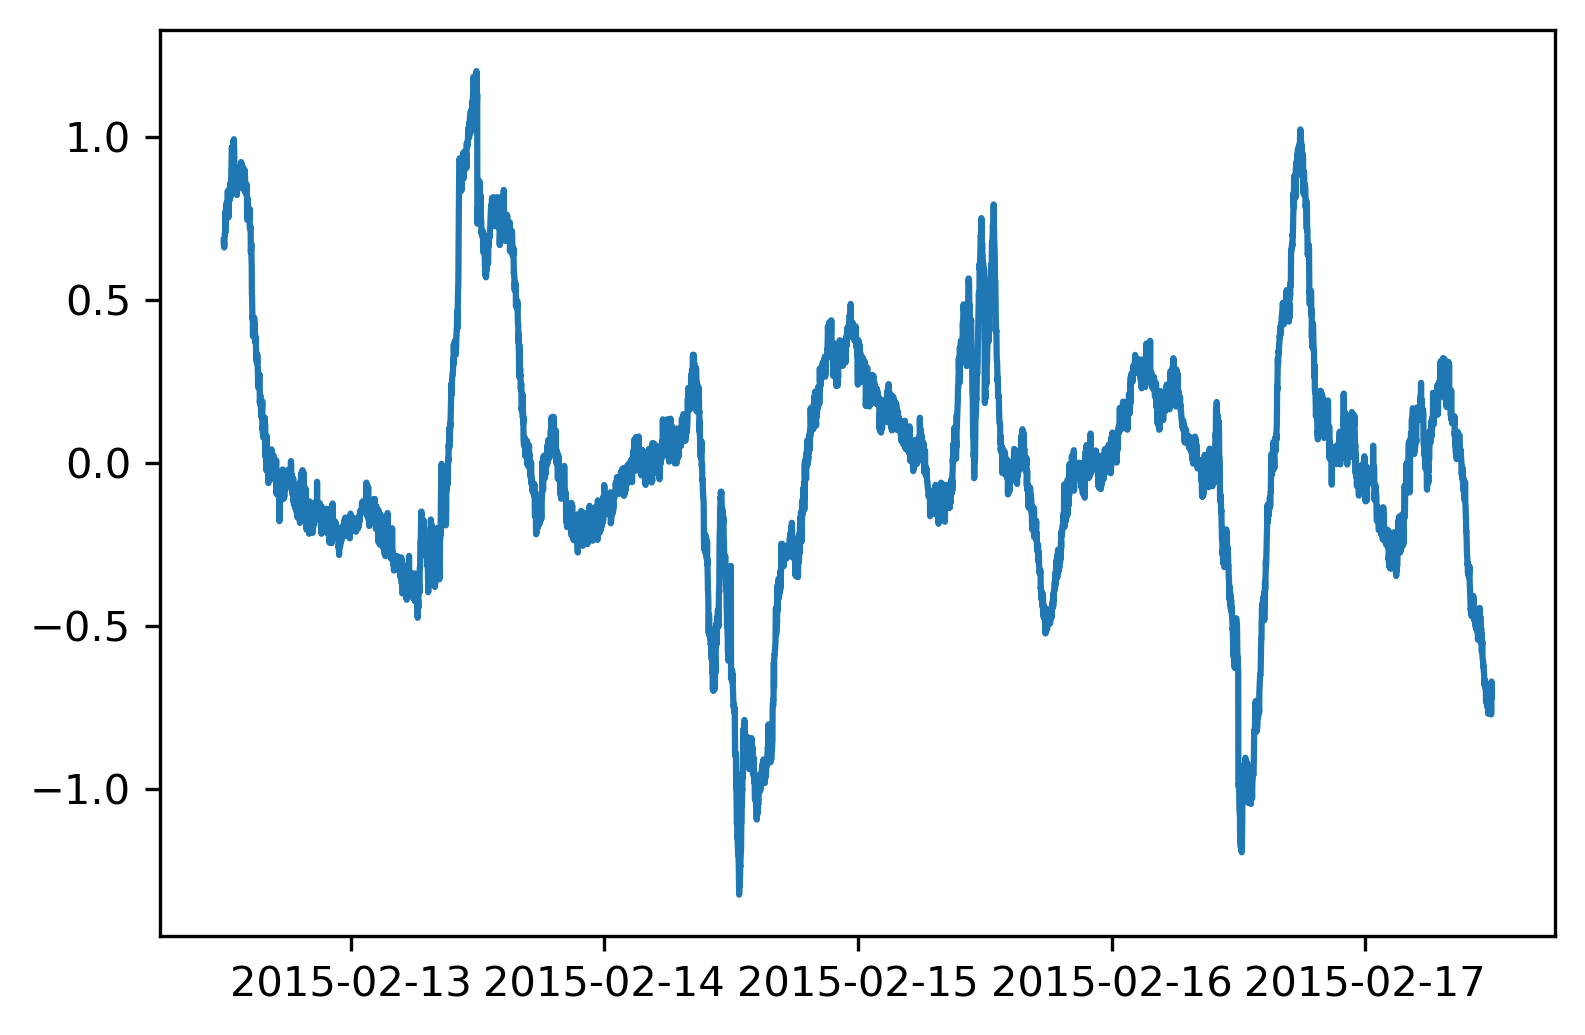

In [31]:
plt.plot(residual)

In [32]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                -7.883220e+00
p-value                        4.642763e-12
#Lags Used                     2.900000e+01
Number of Observations Used    8.581000e+03
Critical Value (1%)           -3.431112e+00
Critical Value (5%)           -2.861877e+00
Critical Value (10%)          -2.566949e+00
dtype: float64


In [33]:
from tslearn.generators import random_walks

In [34]:
ts_random = random_walks(n_ts=1, sz=len(ts), d=1)

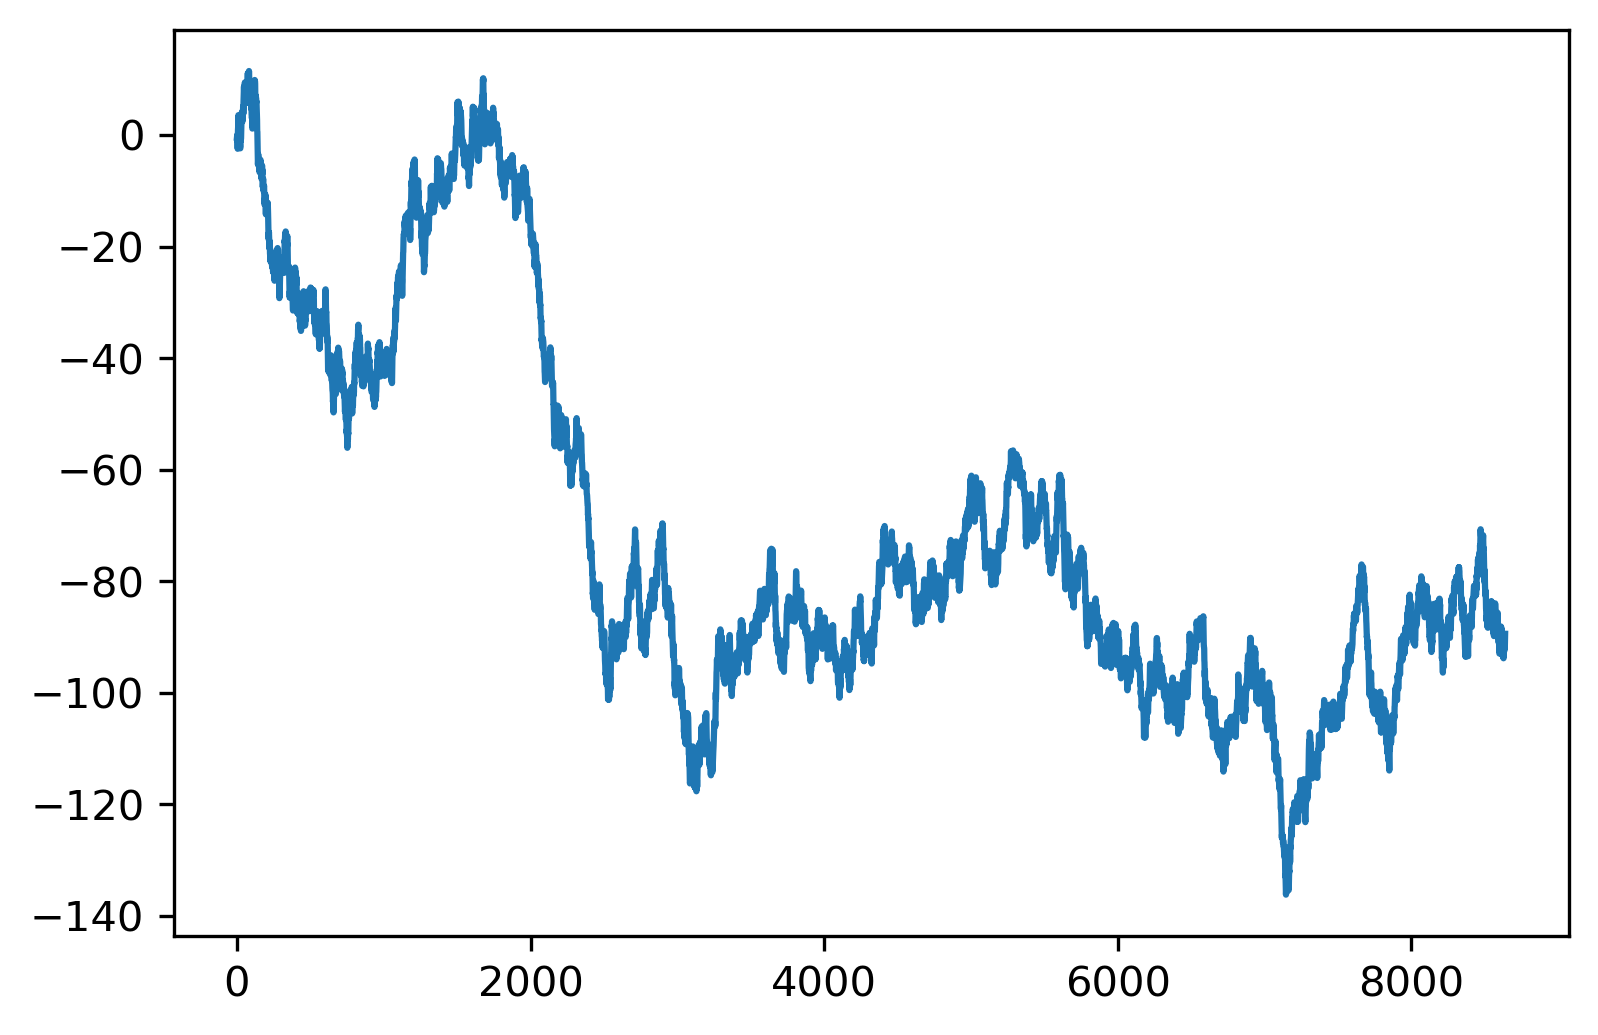

In [35]:
plt.plot(ts_random.ravel())
plt.show()

In [36]:
dftest = adfuller(ts_random.ravel(), autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -2.150689
p-value                           0.224626
#Lags Used                        0.000000
Number of Observations Used    8639.000000
Critical Value (1%)              -3.431107
Critical Value (5%)              -2.861875
Critical Value (10%)             -2.566948
dtype: float64


# Forecasting

In [37]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error


def r2_score(y_true, y_pred, ts):
    mu = np.mean(ts)
    total = np.sum((y_true - mu) ** 2)
    residuals = np.sum((y_true - y_pred) ** 2)
    return 1 - (residuals / total)


def absolute_percentage_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_pred)


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(absolute_percentage_error(y_true, y_pred))


def max_absolute_percentage_error(y_true, y_pred):
    return np.max(absolute_percentage_error(y_true, y_pred))


def total_absolute_percentage_error(y_true, y_pred):
    return np.sum(absolute_percentage_error(y_true, y_pred))


def evaluate(y_true, y_pred, ts):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAD': median_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred, ts),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'MAXAPE': max_absolute_percentage_error(y_true, y_pred),
        'TAPE': total_absolute_percentage_error(y_true, y_pred)
    }

In [39]:
len(ts) *9/10

7776.0

In [40]:
split_index = 7500
train, test = ts.iloc[:split_index], ts.iloc[split_index:]

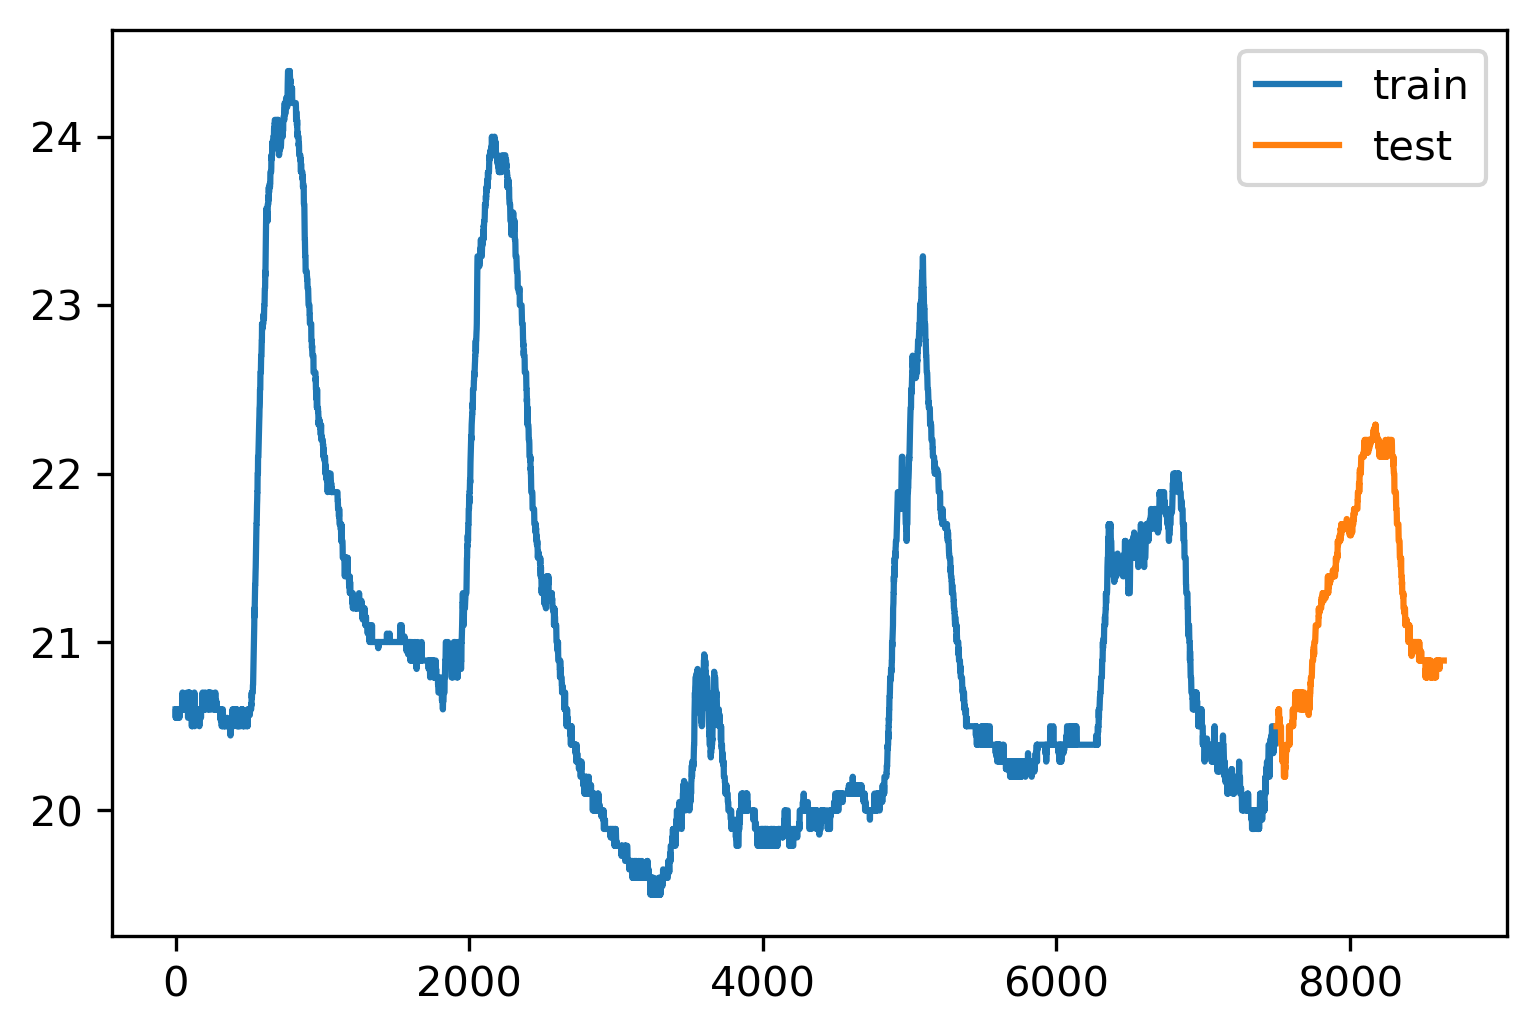

In [41]:
plt.plot(range(split_index), train, label='train')
plt.plot(range(split_index, len(ts)), test, label='test')
plt.legend()
plt.show()

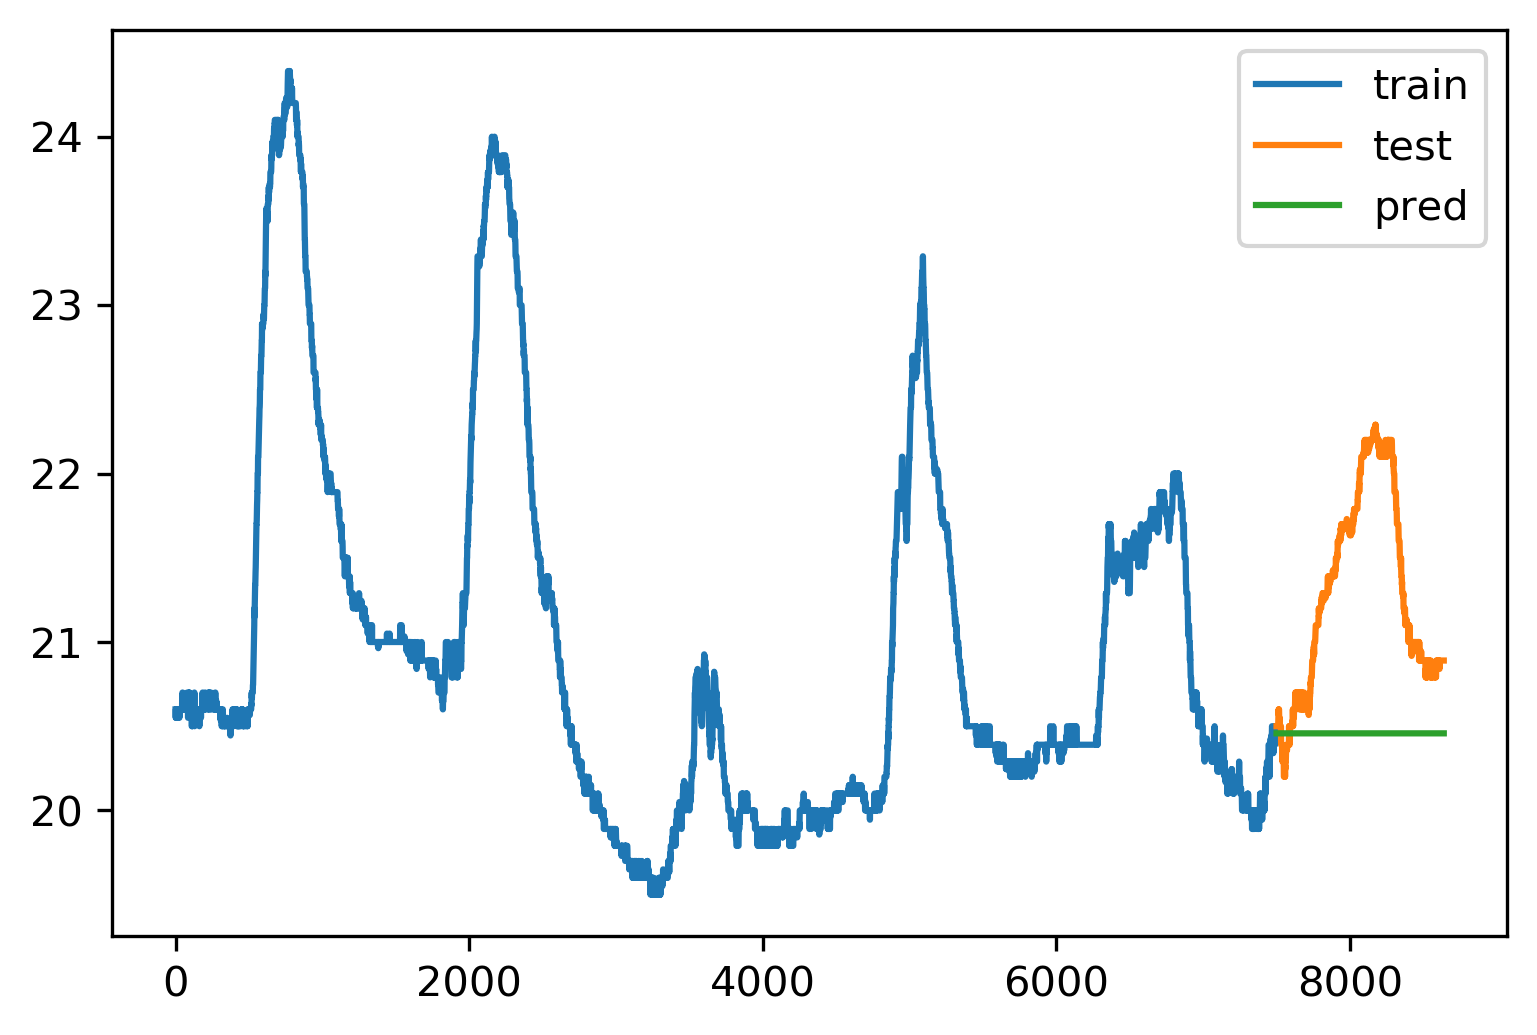

MAE 0.846
RMSE 1.023
MAD 0.742
R2 0.998
MAPE 0.041
MAXAPE 0.090
TAPE 47.163


In [42]:
smoothing_level = 0.1
ses = SimpleExpSmoothing(train).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


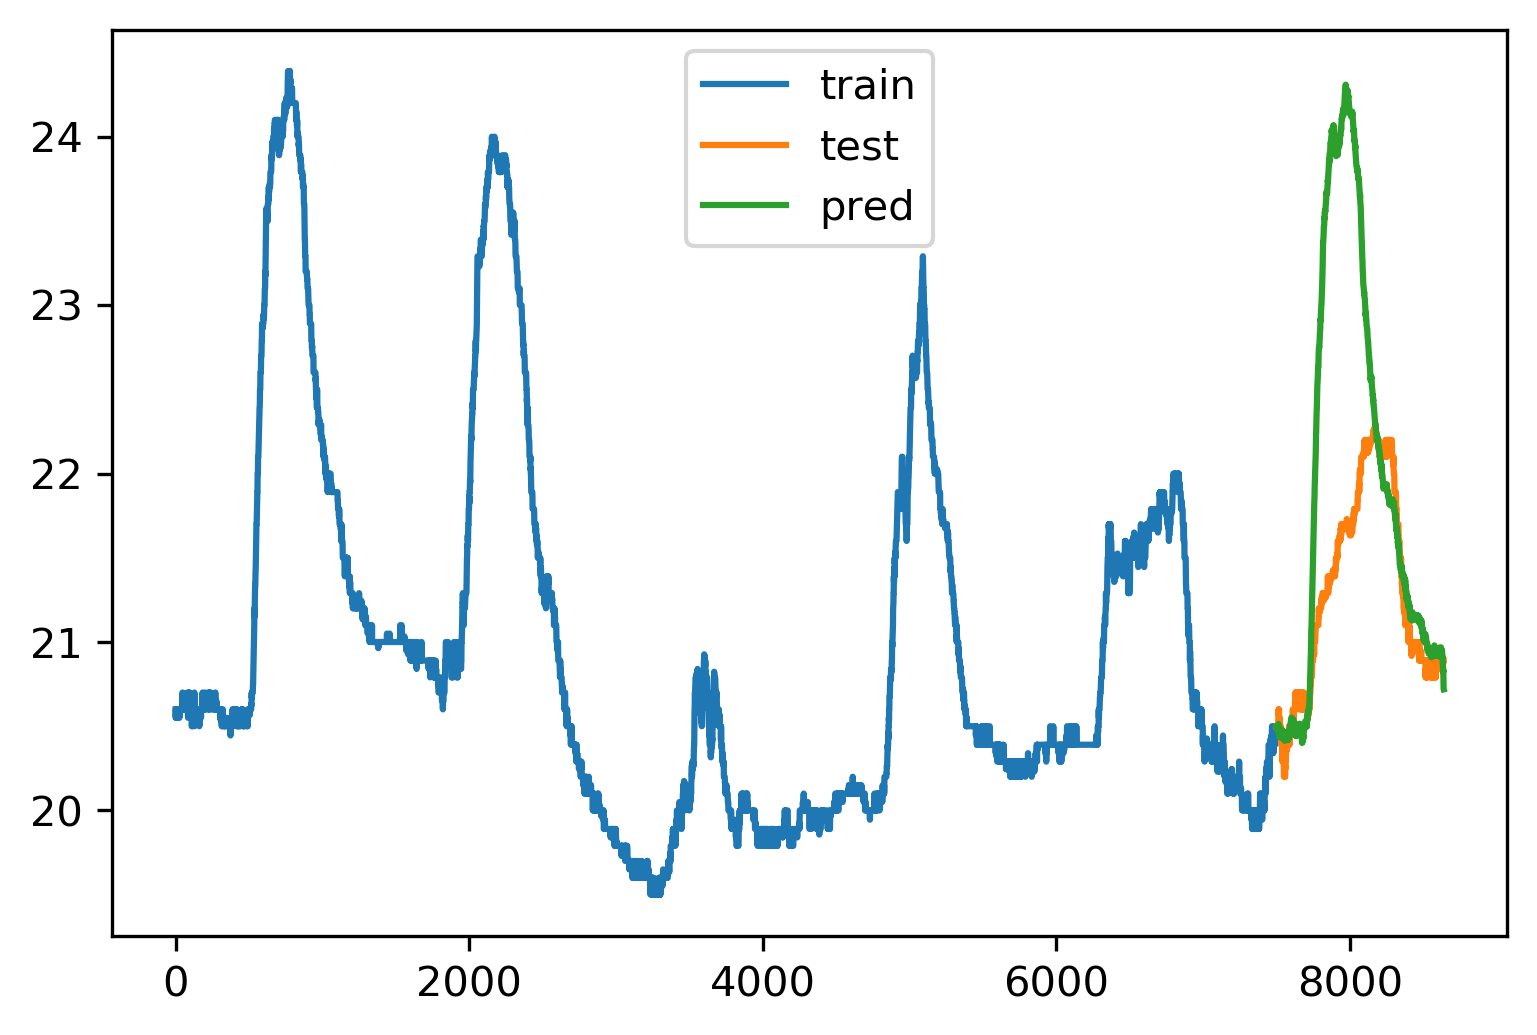

MAE 0.756
RMSE 1.207
MAD 0.197
R2 -2.345
MAPE 0.032
MAXAPE 0.111
TAPE 36.864


In [43]:
seasonal_periods=1440

es = ExponentialSmoothing(train,  seasonal_periods=seasonal_periods, trend='add', damped=True, seasonal='add').fit()
pred = es.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts).items():
    print('%s %.3f' % (k, v))

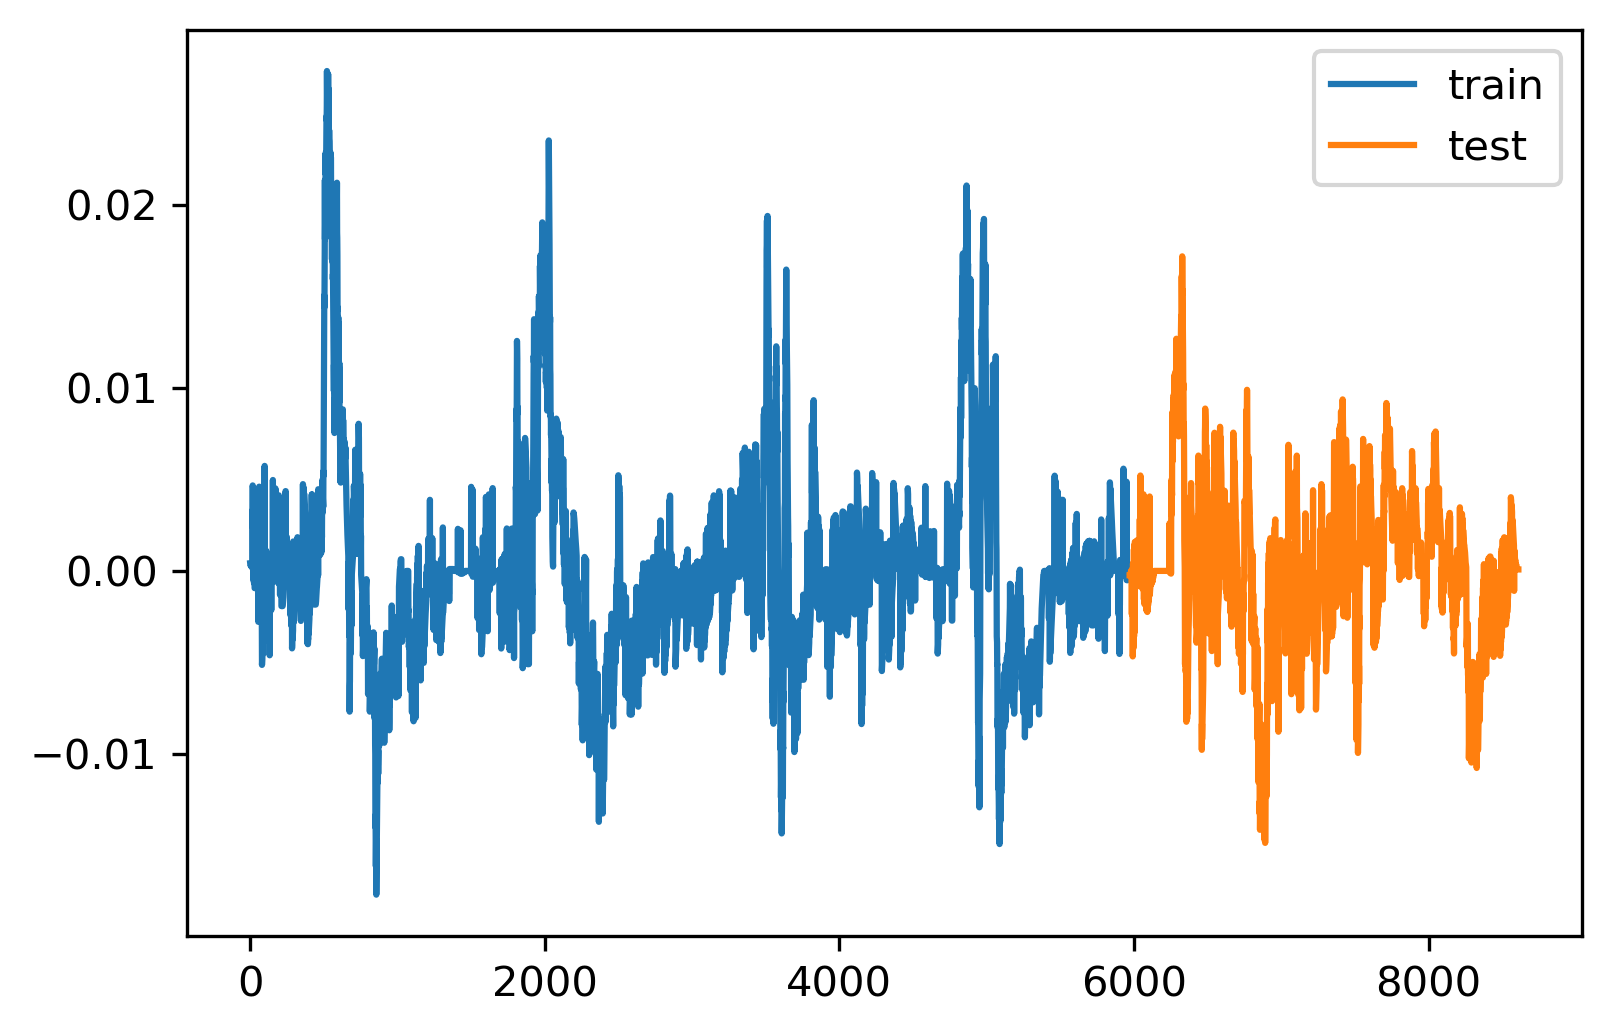

In [44]:
split_index = 6000
train, test = ts_log_mov_diff.iloc[30:split_index], ts_log_mov_diff.iloc[split_index:]

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.legend()
plt.show()

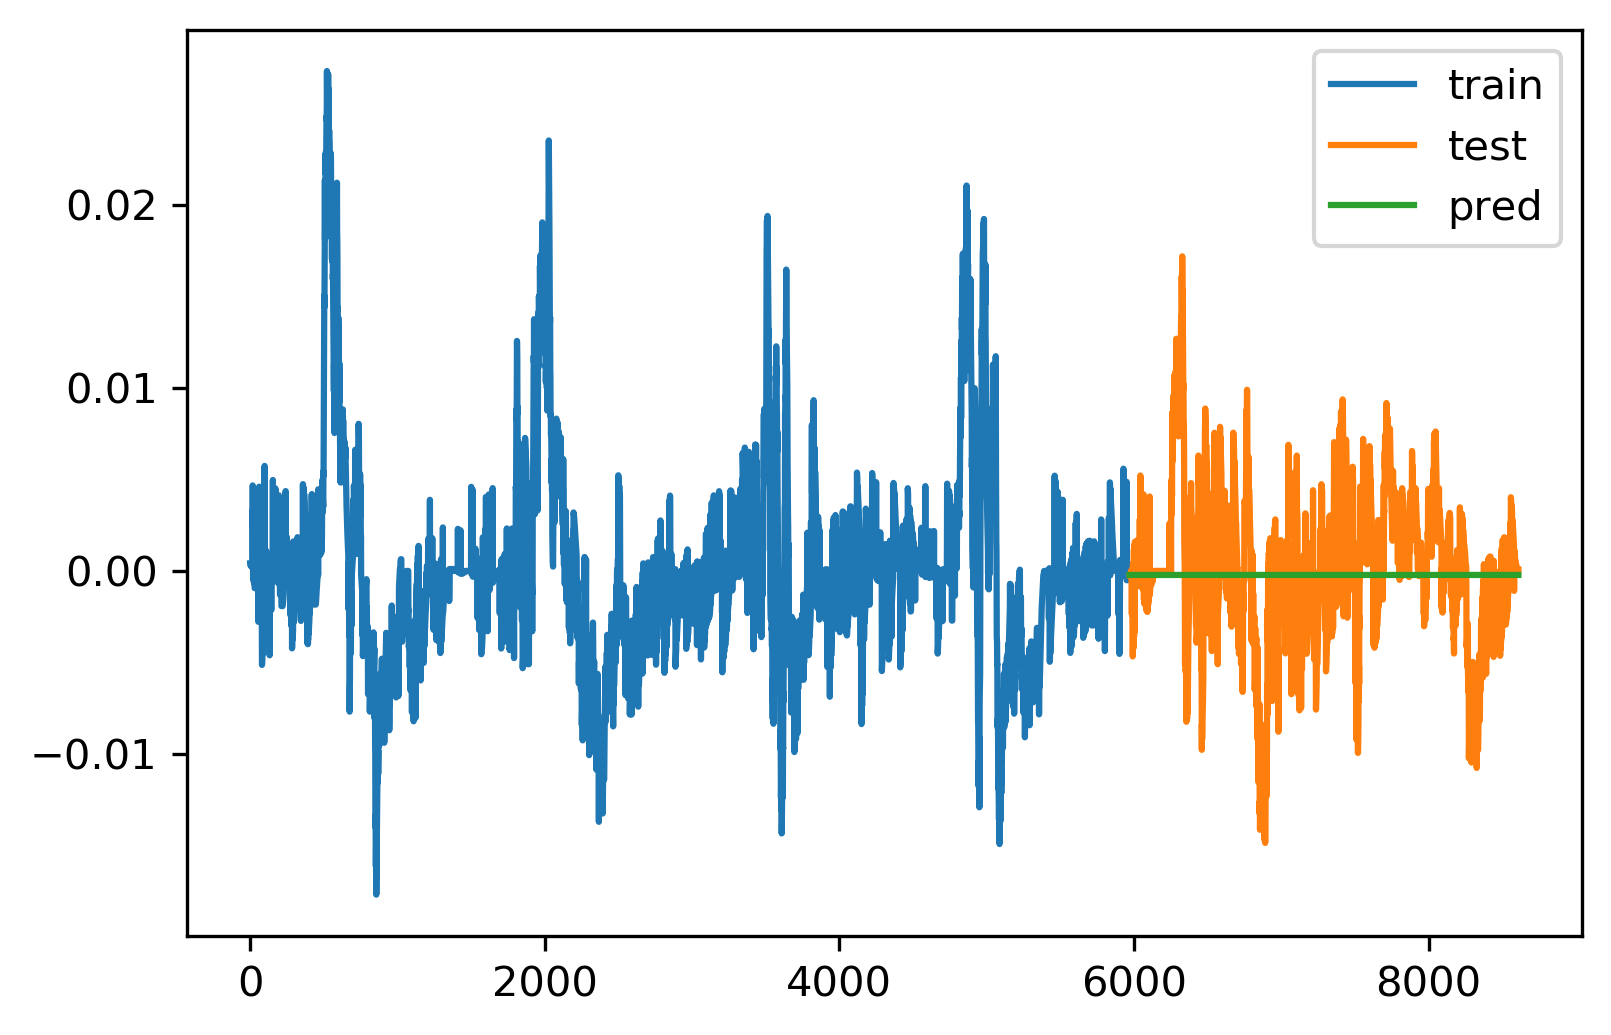

MAE 0.003
RMSE 0.004
MAD 0.002
R2 -0.006
MAPE 13.811
MAXAPE 78.694
TAPE 36460.279


In [45]:
smoothing_level = 0.1
ses = SimpleExpSmoothing(train).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

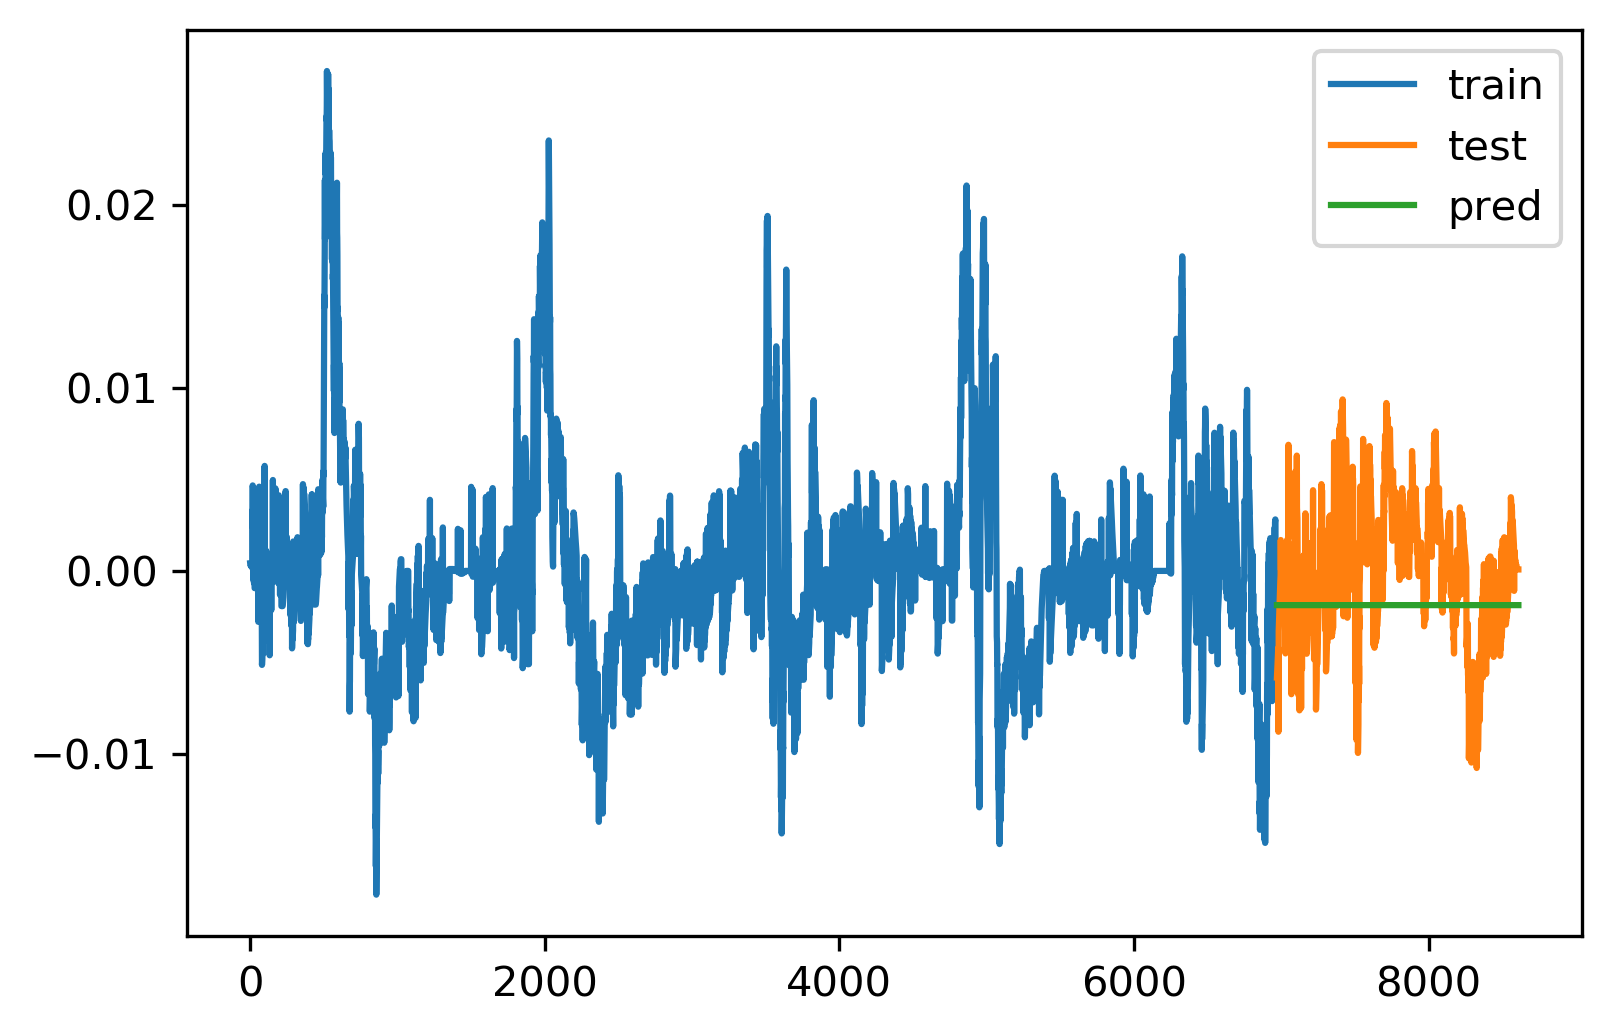

MAE 0.003
RMSE 0.004
MAD 0.003
R2 -0.337
MAPE 1.786
MAXAPE 6.011
TAPE 2929.790


In [61]:
smoothing_level=0.1
smoothing_slope=0.000

holt = Holt(train, damped = True).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)
pred = holt.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


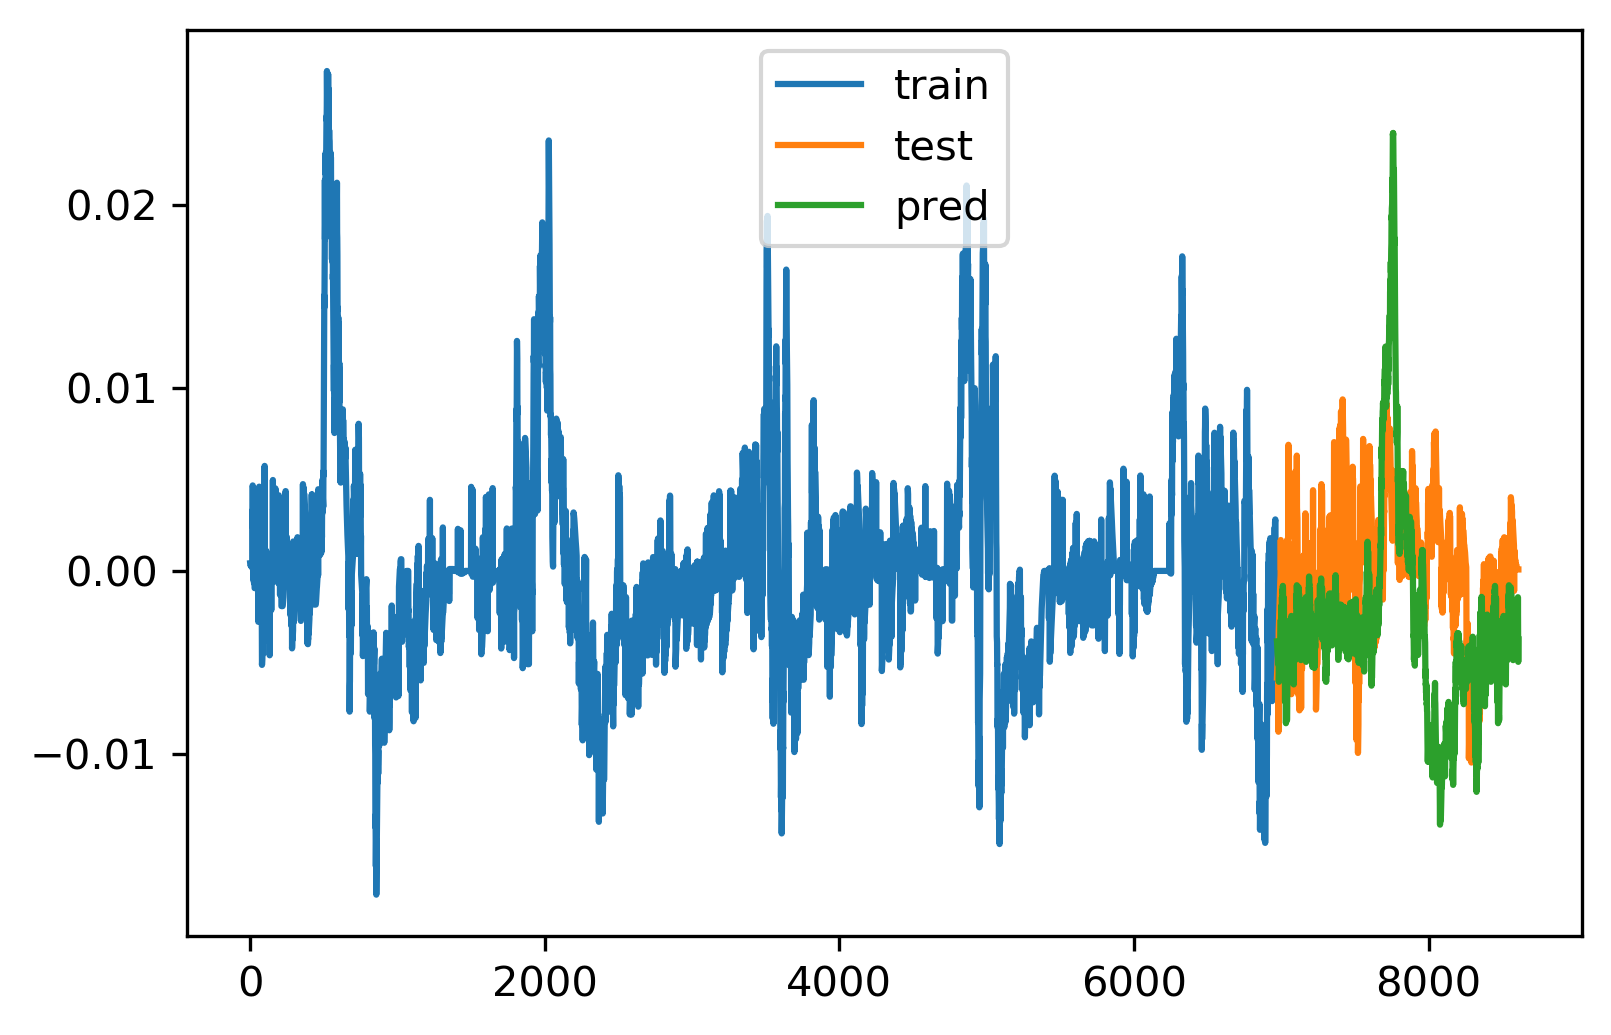

MAE 0.005
RMSE 0.006
MAD 0.004
R2 1.000
MAPE 1.513
MAXAPE 342.306
TAPE 2481.600


In [71]:
seasonal_periods=1440

es = ExponentialSmoothing(train, seasonal_periods=seasonal_periods, seasonal='add').fit()
pred = es.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts).items():
    print('%s %.3f' % (k, v))

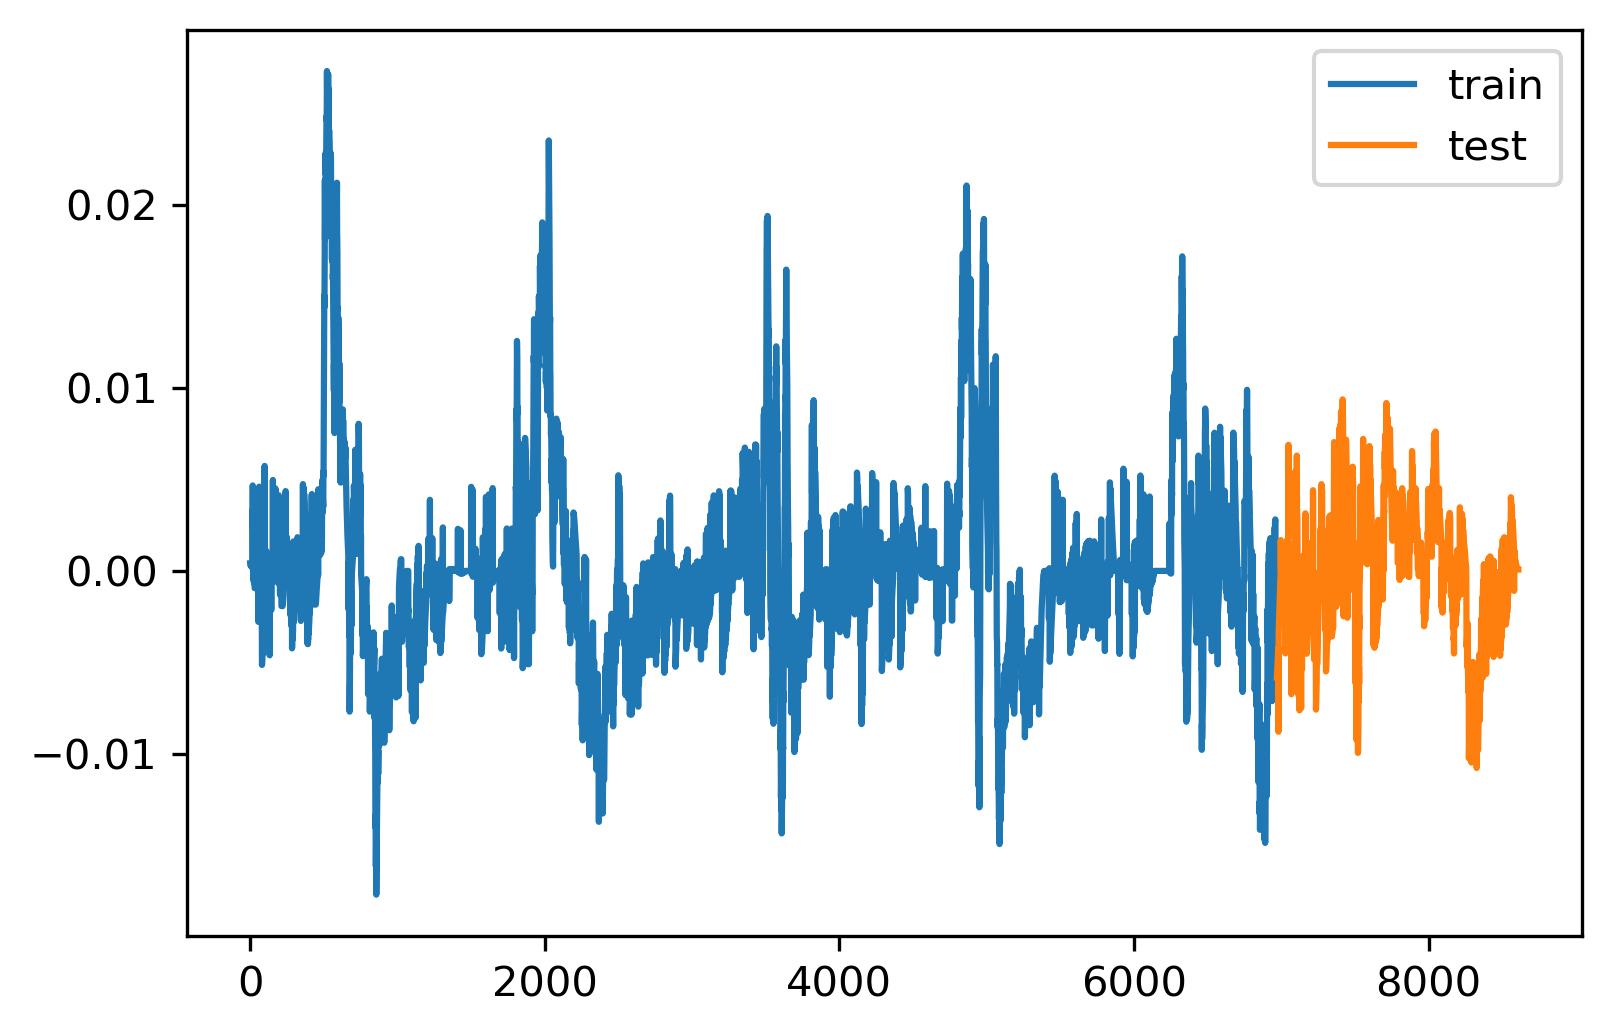

In [48]:
split_index = 7000
train, test = ts_log_mov_diff.iloc[30:split_index], ts_log_mov_diff.iloc[split_index:]

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.legend()
plt.show()

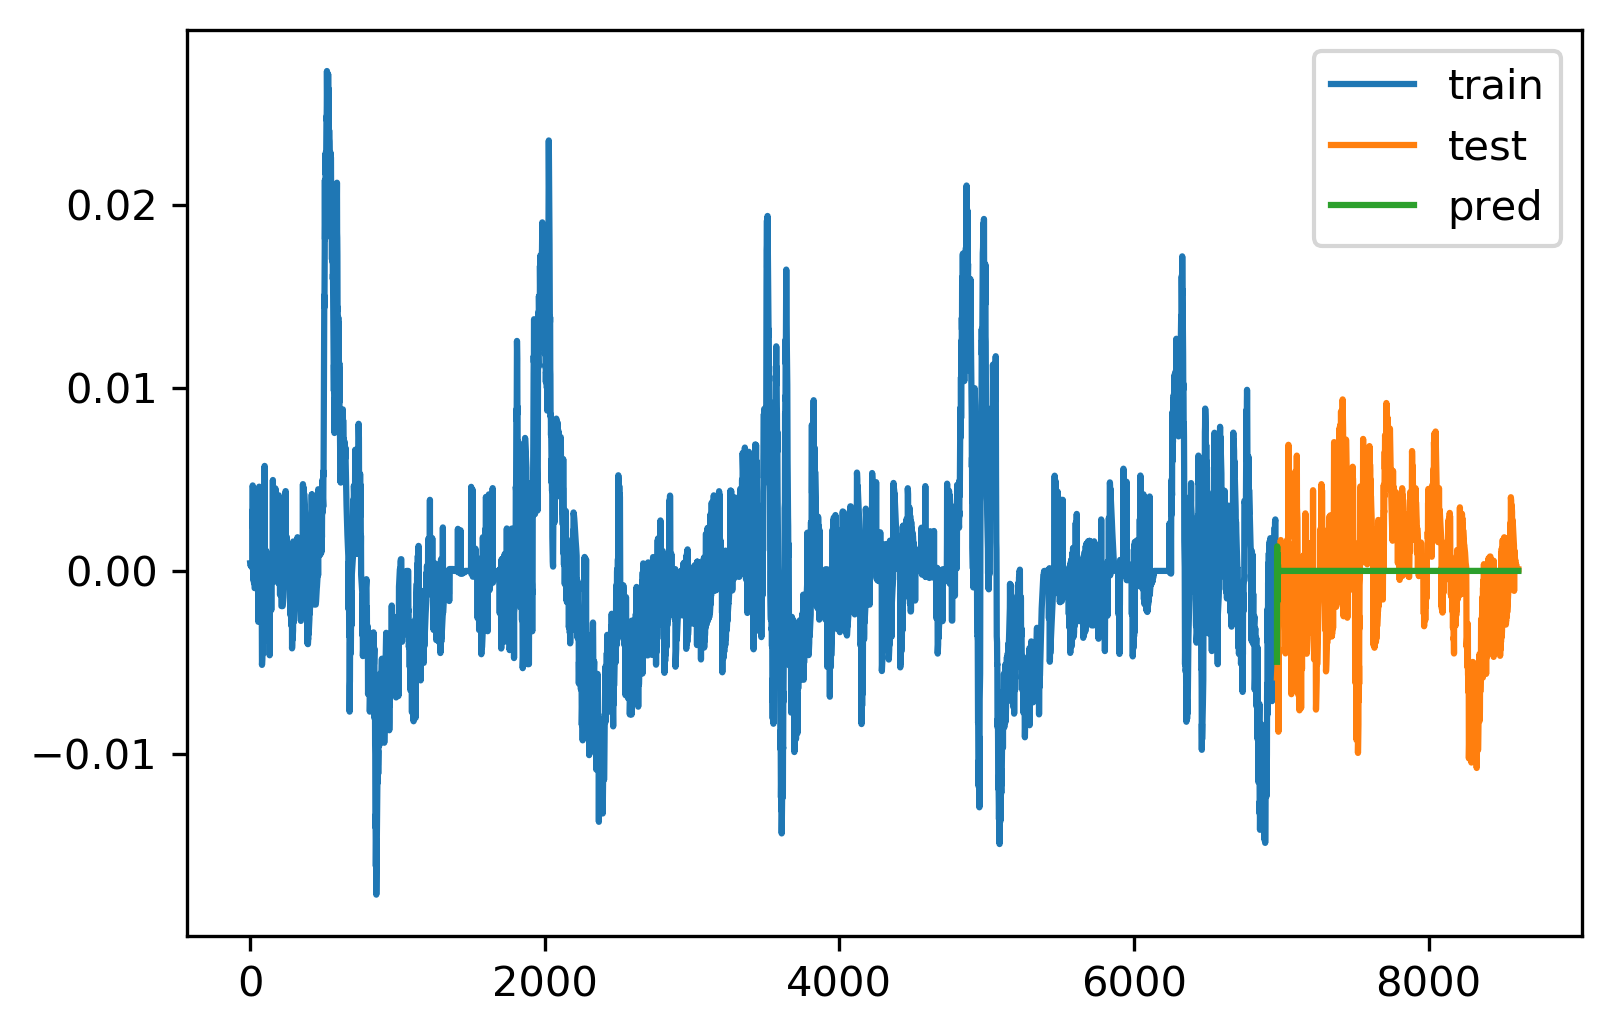

MAE 0.003
RMSE 0.003
MAD 0.002
R2 -0.000
MAPE 22360.158
MAXAPE 91863.476
TAPE 36670659.024


In [65]:
arima = ARIMA(train, order=(2,2,0), freq = 'min').fit()
pred = arima.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

In [ ]:
split_index = 7000
train, test = ts_log_mov_diff.iloc[:split_index], ts_log_mov_diff.iloc[split_index:]

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.legend()
plt.show()

In [ ]:
sarimax = SARIMAX(train, order=(1,0,0),enforce_stationarity = False, seasonal_order=(1, 0, 0, 1440)).fit(disp=False)
pred = sarimax.predict(start=test.index[0], end=test.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

In [ ]:
sarimax = SARIMAX(train, order=(1,0,0),enforce_stationarity = False, seasonal_order=(6, 1, 0, 1)).fit(disp=False)
pred_train = sarimax.predict(start=train.index[0], end=train.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train)), pred_train, label='pred train')
plt.legend()
plt.show()

for k, v in evaluate(train, pred_train, ts).items():
    print('%s %.3f' % (k, v))

In [ ]:
print(sarimax.summary())

# Merge the datasets

In [51]:
df=pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/datatraining.txt')
df['date'] =  pd.to_datetime(df['date'], format = '%Y-%m-%d %H:%M:%S')
df.sort_values('date', inplace = True)
df.reset_index(inplace = True, drop = True)


test = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/datatest.txt')
test['date'] =  pd.to_datetime(test['date'], format = '%Y-%m-%d %H:%M:%S')
test.sort_values('date', inplace = True)
test.reset_index(inplace = True, drop = True)

test2 = pd.read_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/datatest2.txt')
test2['date'] =  pd.to_datetime(test2['date'], format = '%Y-%m-%d %H:%M:%S')
test2.sort_values('date', inplace = True)
test2.reset_index(inplace = True, drop = True)

print(df.head())
print(df.tail()) 



print(test.head())# non me ne faccio praticamente un czzo del test set, ci son cinque ore di buco tra il training ed i test 
print(test.tail())

print(test2.head()) 
print(test2.tail())

                 date  Temperature  Humidity  Light     CO2  HumidityRatio  \
0 2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
1 2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
2 2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
3 2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
4 2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
0          1  
1          1  
2          1  
3          1  
4          1  
                    date  Temperature  Humidity  Light         CO2  \
8138 2015-02-10 09:29:00        21.05   36.0975  433.0  787.250000   
8139 2015-02-10 09:29:59        21.05   35.9950  433.0  789.500000   
8140 2015-02-10 09:30:59        21.10   36.0950  433.0  798.500000   
8141 2015-02-10 09:32:00        21.10   36.2600  433.0  820.333333   
8142 2015-02-10 09:33:00        21.10   36.2000  447.0  821.000000   

      HumidityRatio 

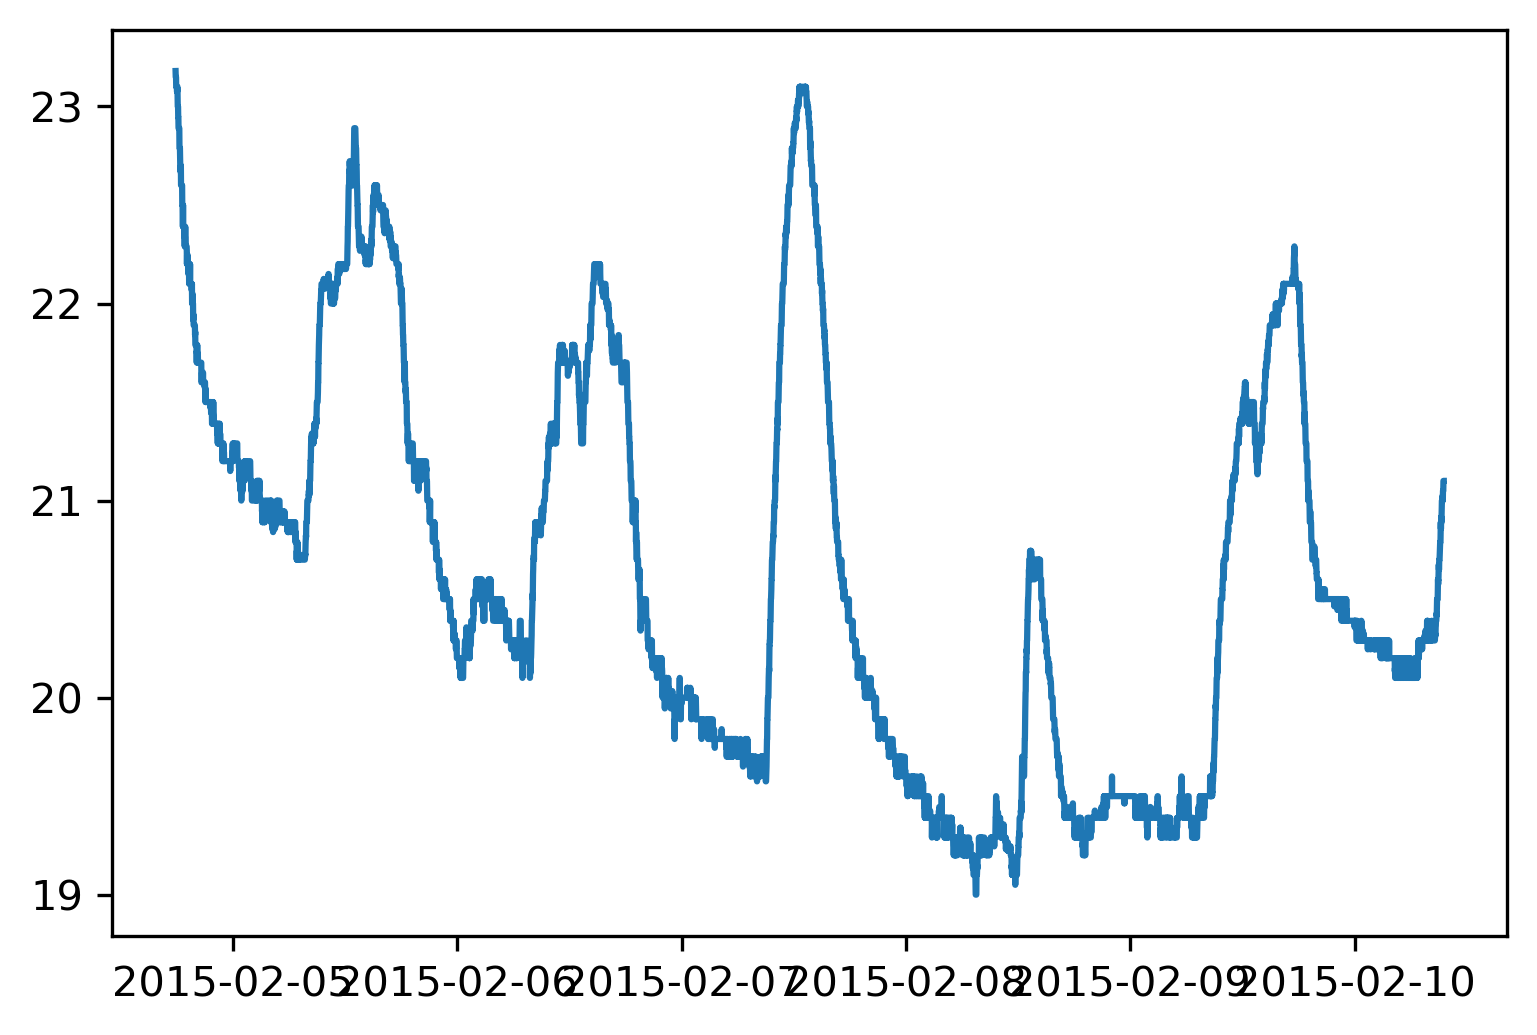

2015-02-04 17:51:00    23.18
2015-02-04 17:52:00    23.15
2015-02-04 17:53:00    23.15
2015-02-04 17:54:00    23.15
2015-02-04 17:55:00    23.10
                       ...  
2015-02-10 09:29:00    21.05
2015-02-10 09:30:00    21.05
2015-02-10 09:31:00    21.10
2015-02-10 09:32:00    21.10
2015-02-10 09:33:00    21.10
Freq: T, Length: 8143, dtype: float64

In [52]:
#print(len(df))
#print(( 24*60-17*60 -51)+ 60 *24*5+ (9*60+33)) #ho un dato per ogni minuto, posso creare un indice minuto per minuto
index = pd.date_range(start=df['date'][0], end=df['date'][len(df)-1], freq='min')
ts1 = df['Temperature']


ts1 = pd.Series(ts1.values, index)
plt.plot(ts1)
plt.show()
ts1

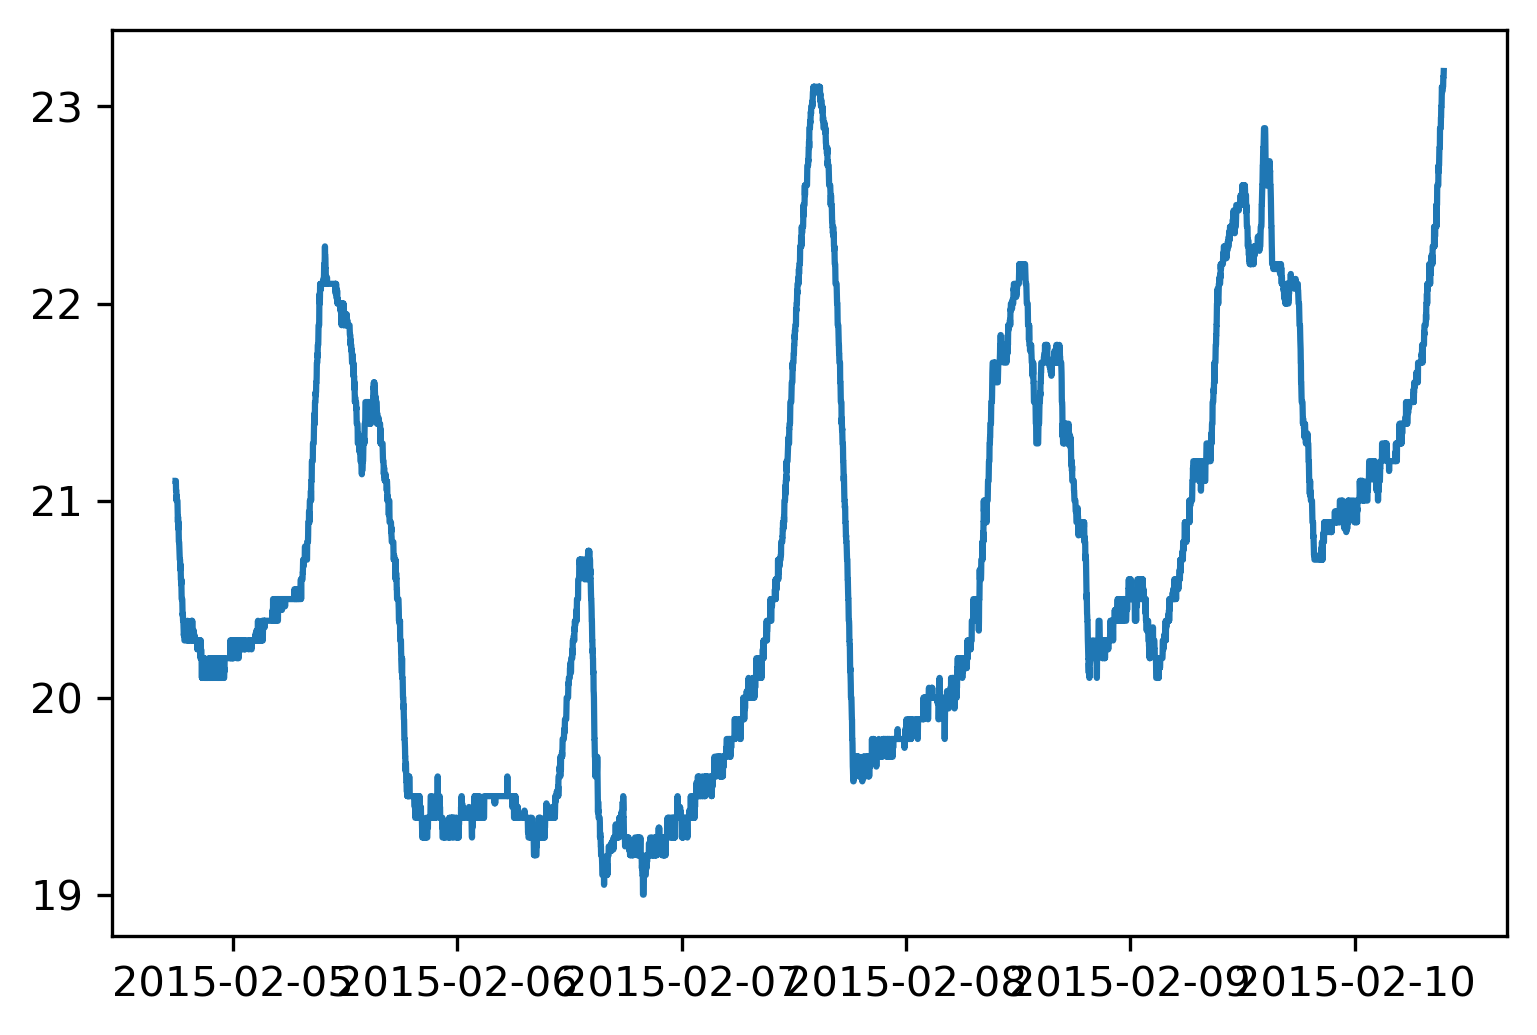

2015-02-04 17:51:00    23.18
2015-02-04 17:52:00    23.15
2015-02-04 17:53:00    23.15
2015-02-04 17:54:00    23.15
2015-02-04 17:55:00    23.10
                       ...  
2015-02-10 09:29:00    21.05
2015-02-10 09:30:00    21.05
2015-02-10 09:31:00    21.10
2015-02-10 09:32:00    21.10
2015-02-10 09:33:00    21.10
Freq: T, Length: 8143, dtype: float64

In [53]:
#print(len(df))
#print(( 24*60-17*60 -51)+ 60 *24*5+ (9*60+33)) #ho un dato per ogni minuto, posso creare un indice minuto per minuto
index = pd.date_range(start=df['date'][0], end=df['date'][len(df)-1], freq='min')
ts1r = reversed(df['Temperature'].values)


ts1r = pd.Series(ts1r, index)
plt.plot(ts1r)
plt.show()
ts1

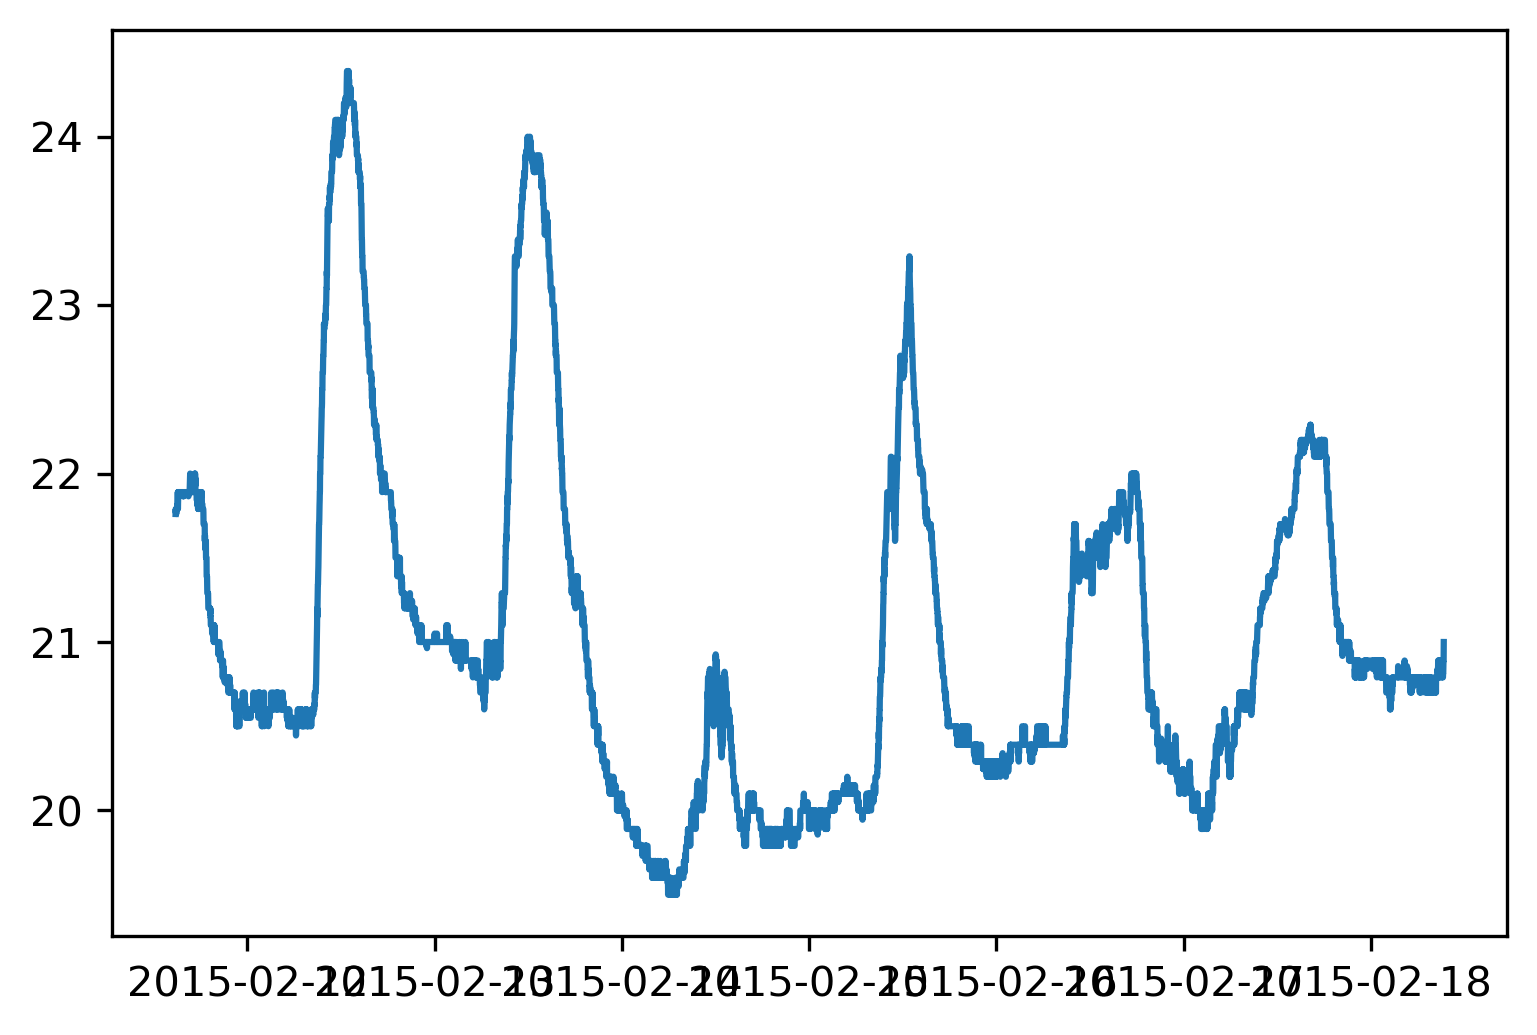

2015-02-11 14:48:00    21.7600
2015-02-11 14:49:00    21.7900
2015-02-11 14:50:00    21.7675
2015-02-11 14:51:00    21.7675
2015-02-11 14:52:00    21.7900
                        ...   
2015-02-18 09:15:00    20.8150
2015-02-18 09:16:00    20.8650
2015-02-18 09:17:00    20.8900
2015-02-18 09:18:00    20.8900
2015-02-18 09:19:00    21.0000
Freq: T, Length: 9752, dtype: float64

In [54]:
#print(len(test2))
#print(( 24*60-14*60 -48)+ 60 *24*6+ (9*60+19)) #ho un dato per ogni minuto, posso creare un indice minuto per minuto
index = pd.date_range(start=test2['date'][0], end=test2['date'][len(test2)-1], freq='min')
index
ts2 = test2['Temperature']


ts2 = pd.Series(ts2.values, index)
plt.plot(ts2)
plt.show()
ts2

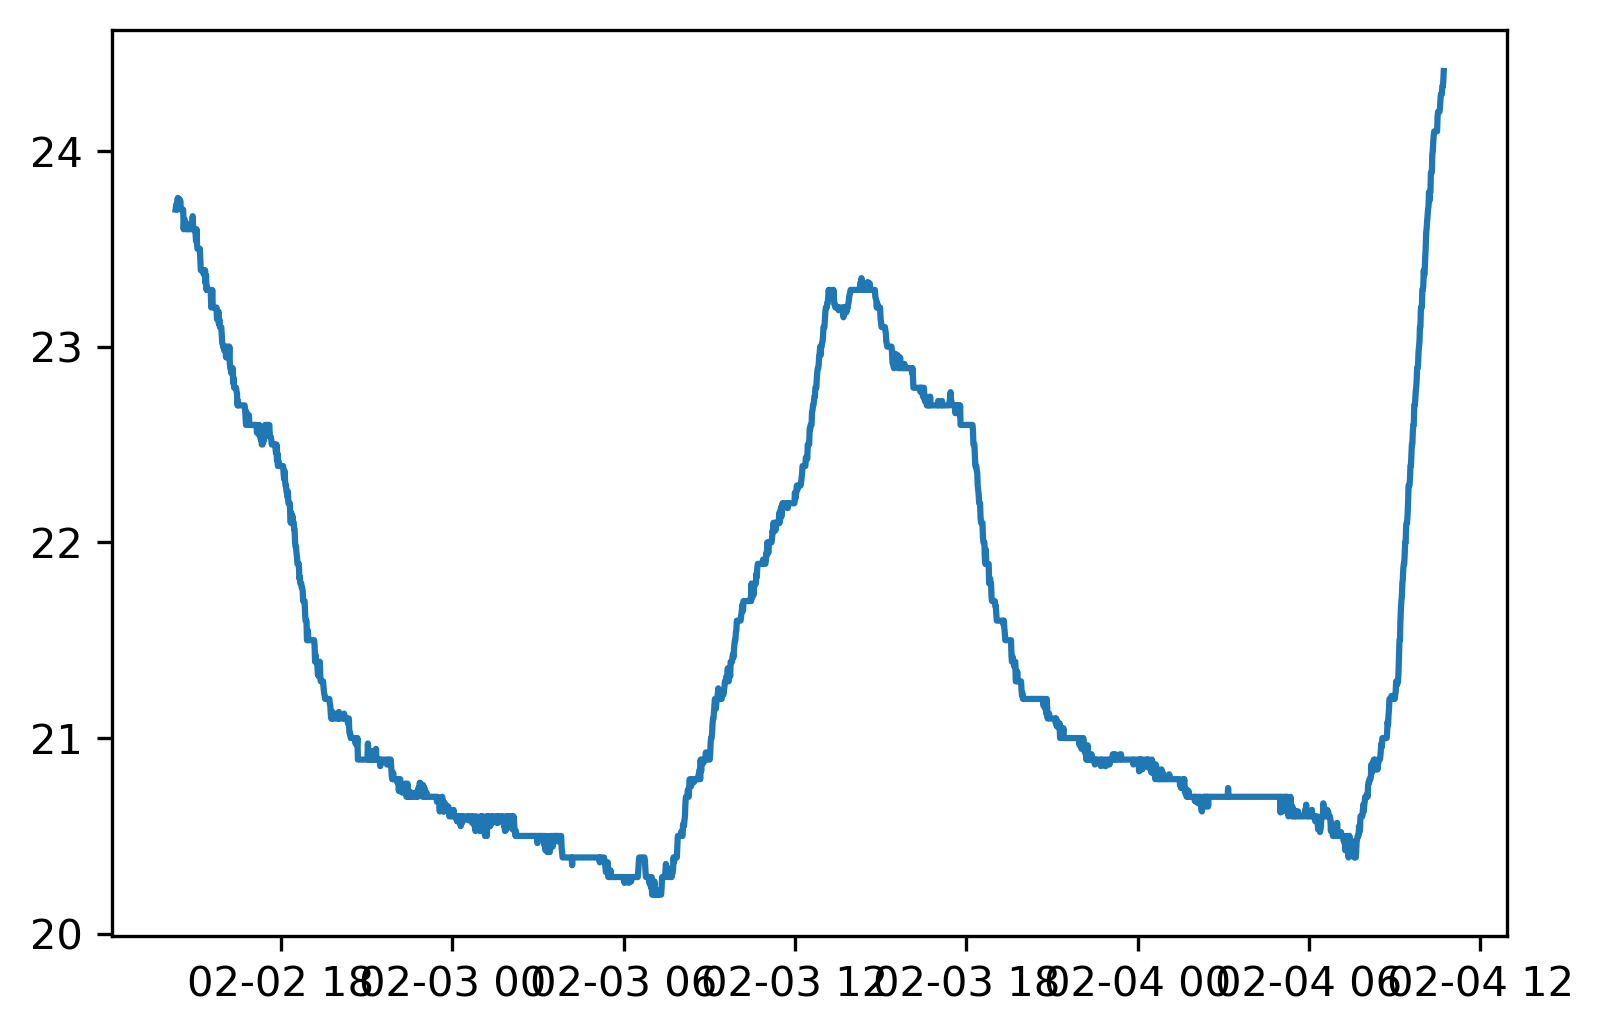

2015-02-02 14:19:00    23.700000
2015-02-02 14:20:00    23.718000
2015-02-02 14:21:00    23.730000
2015-02-02 14:22:00    23.722500
2015-02-02 14:23:00    23.754000
                         ...    
2015-02-04 10:39:00    24.290000
2015-02-04 10:40:00    24.330000
2015-02-04 10:41:00    24.330000
2015-02-04 10:42:00    24.356667
2015-02-04 10:43:00    24.408333
Freq: T, Length: 2665, dtype: float64

In [55]:

index = pd.date_range(start=test['date'][0], end=test['date'][len(test)-1], freq='min')
index
ts0= test['Temperature']


ts0 = pd.Series(ts0.values, index)
plt.plot(ts0)
plt.show()
ts0

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


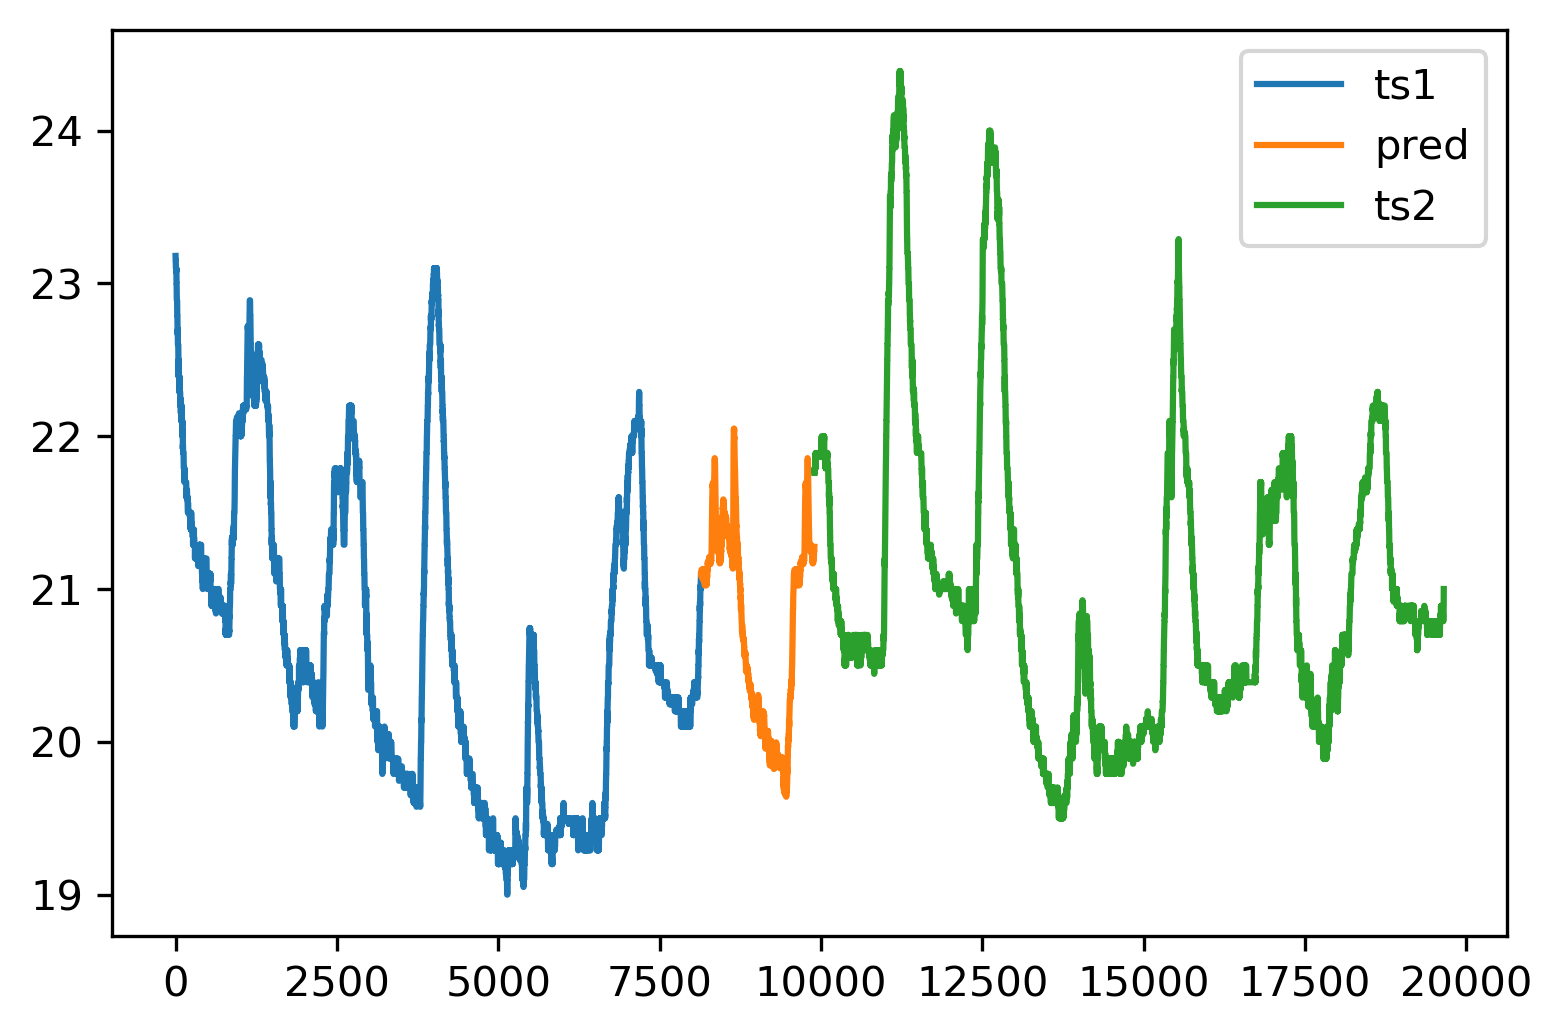

In [56]:
seasonal_periods=1440

es = ExponentialSmoothing(ts1,  seasonal_periods=seasonal_periods,seasonal='add').fit()
pred = es.predict(start=ts1.index[-1], end=ts2.index[0])

plt.plot(range(len(ts1)), ts1, label='ts1')
plt.plot(range(len(ts1), len(ts1)+len(pred)), pred, label='pred')
plt.plot(range(len(ts1)+len(pred), len(ts1)+len(pred)+len(ts2) ), ts2, label='ts2')
plt.legend()
plt.show()
pred1 = pred.values

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


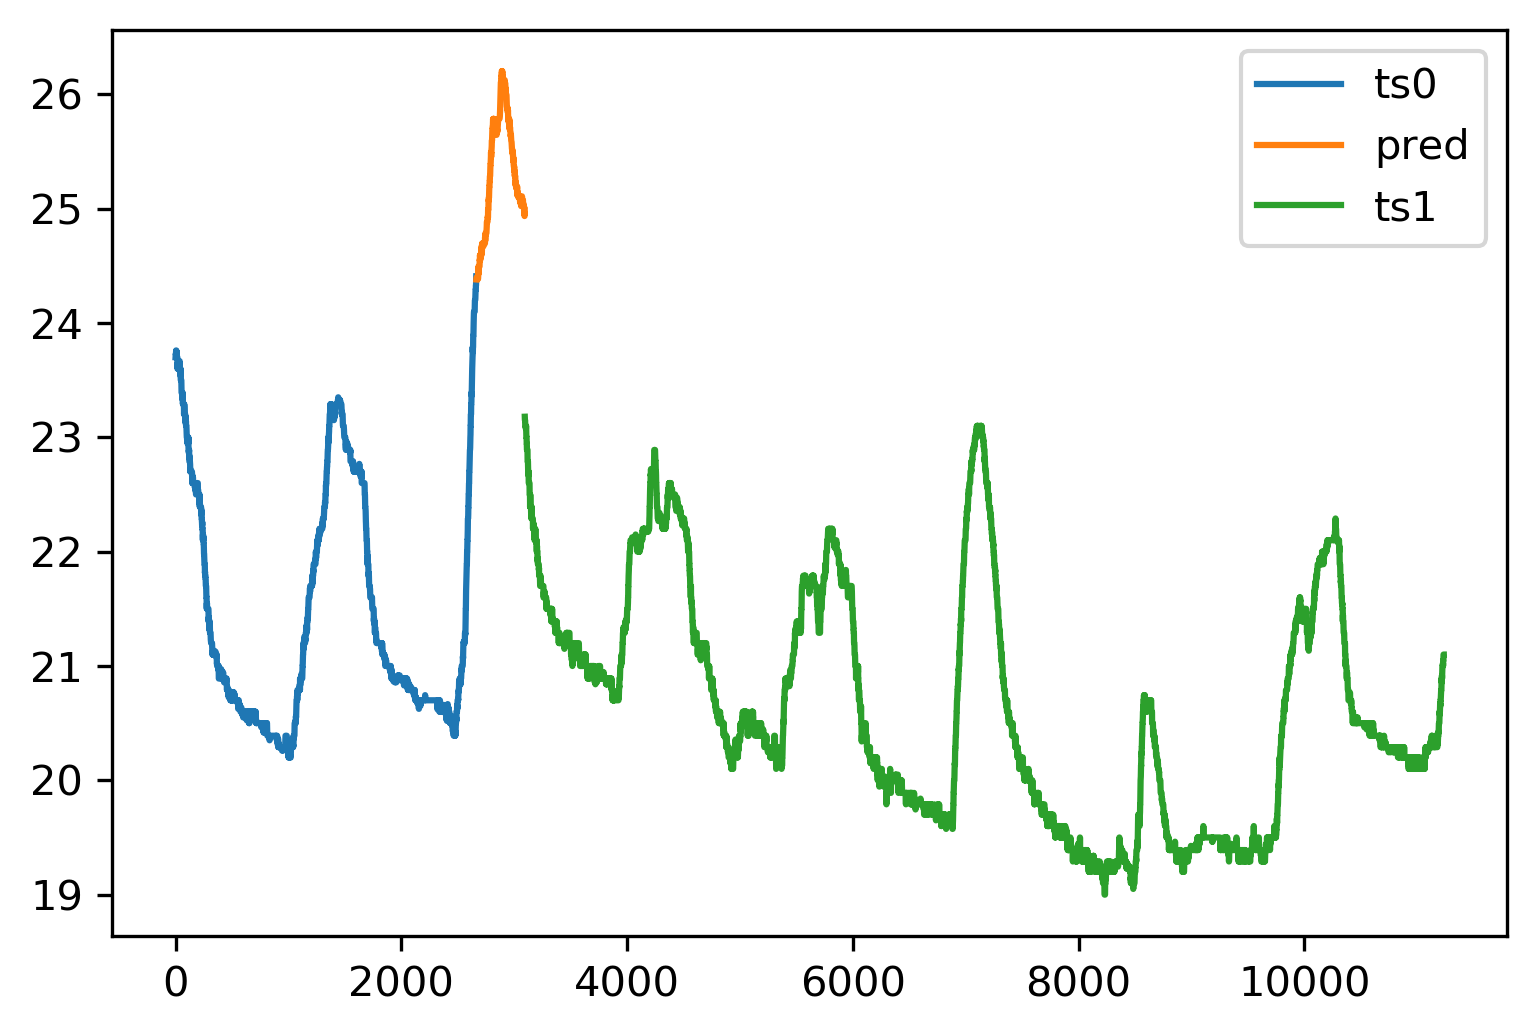

In [57]:
seasonal_periods=1440

es = ExponentialSmoothing(ts0,  seasonal_periods=seasonal_periods, seasonal='add').fit()
pred0 = es.predict(start=ts0.index[-1], end=ts1.index[0])

plt.plot(range(len(ts0)), ts0, label='ts0')
plt.plot(range(len(ts0), len(ts0)+len(pred0)), pred0, label='pred')
plt.plot(range(len(ts0)+len(pred0), len(ts0)+len(pred0)+len(ts1) ), ts1, label='ts1')
plt.legend()
plt.show()
pred00 = pred0.values

In [58]:
print( ts1.index[-1])
print(ts1.index[0] - ts0.index[-1])

2015-02-10 09:33:00
0 days 07:08:00


2015-02-10 16:41:00

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


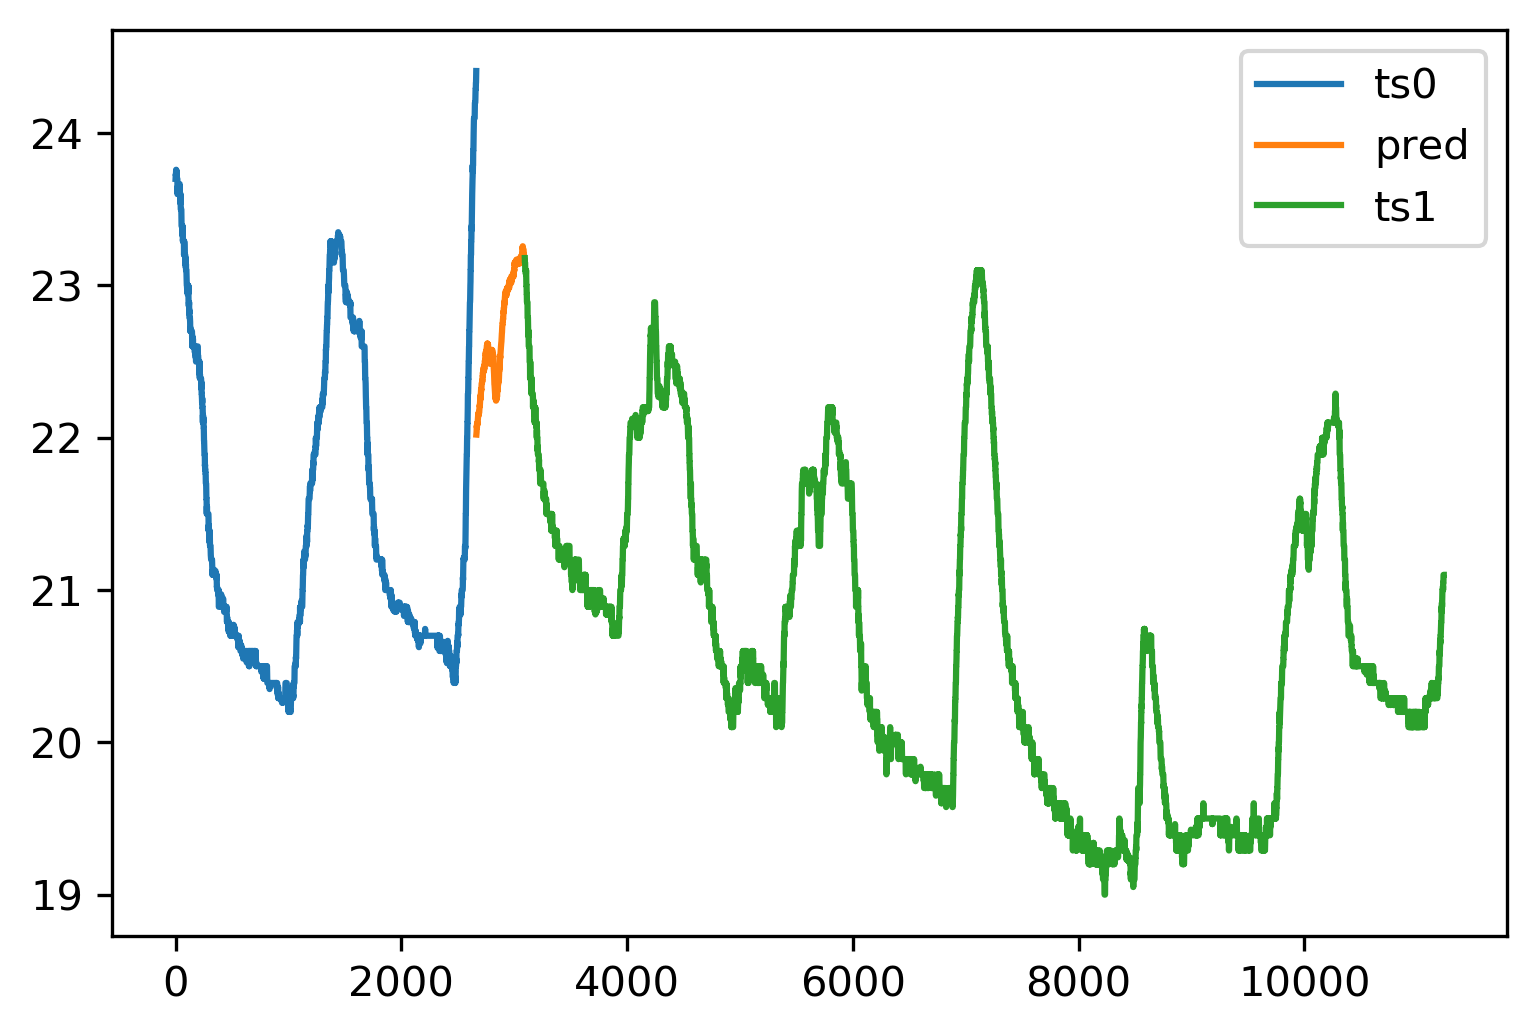

In [59]:
seasonal_periods=1440

es = ExponentialSmoothing(ts1r,  seasonal_periods=seasonal_periods, seasonal='add').fit()
pred0r = es.predict(start=ts1r.index[-1], end='2015-02-10 16:41:00')

pred0 = pred0r.values[::-1]

plt.plot(range(len(ts0)), ts0, label='ts0')
plt.plot(range(len(ts0), len(ts0)+len(pred0)), pred0, label='pred')
plt.plot(range(len(ts0)+len(pred0), len(ts0)+len(pred0)+len(ts1) ), ts1, label='ts1')
plt.legend()
plt.show()

In [60]:
print(len(pred00), len(pred0))

429 429


In [61]:
pred000 = []
l = len(pred0)
for i in range(l):
    pred000.append( (pred0[i] * i + pred00[i] * (l -i) )/ l)

len(pred000)
    

429

In [62]:
pred0000 = [(pred0[i] * i + pred00[i] * (len(pred00) -i) )/ len(pred00) for i in range(len(pred00))]

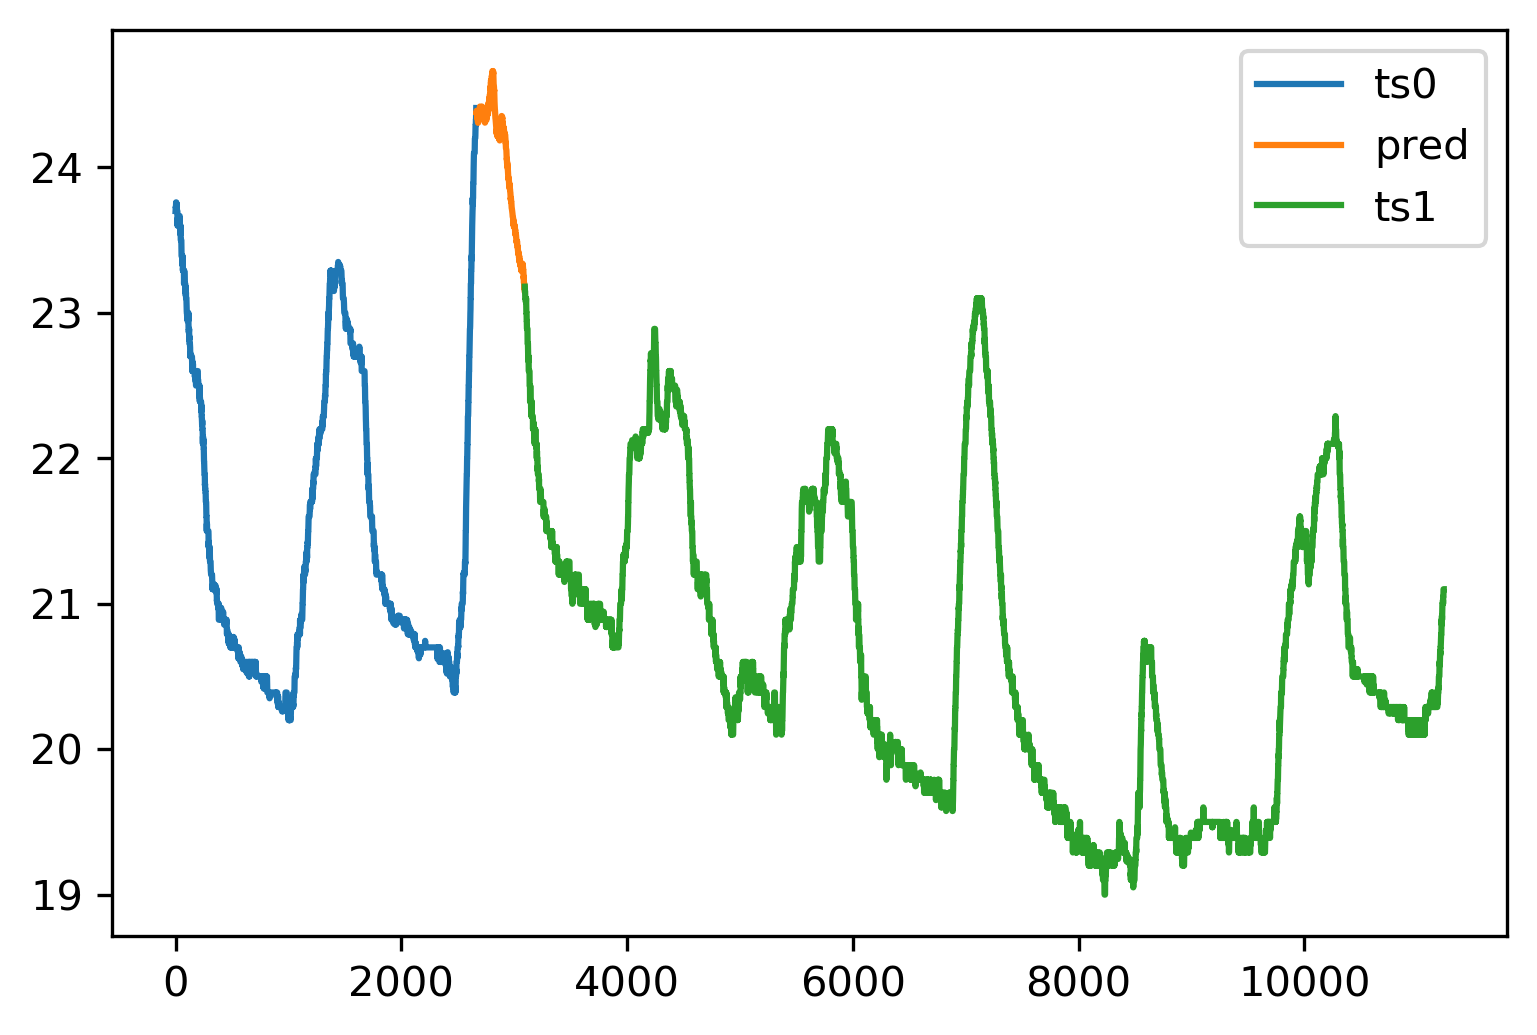

In [63]:
plt.plot(range(len(ts0)), ts0, label='ts0')
plt.plot(range(len(ts0), len(ts0)+len(pred000)), pred0000, label='pred')
plt.plot(range(len(ts0)+len(pred0), len(ts0)+len(pred000)+len(ts1) ), ts1, label='ts1')
plt.legend()
plt.show()

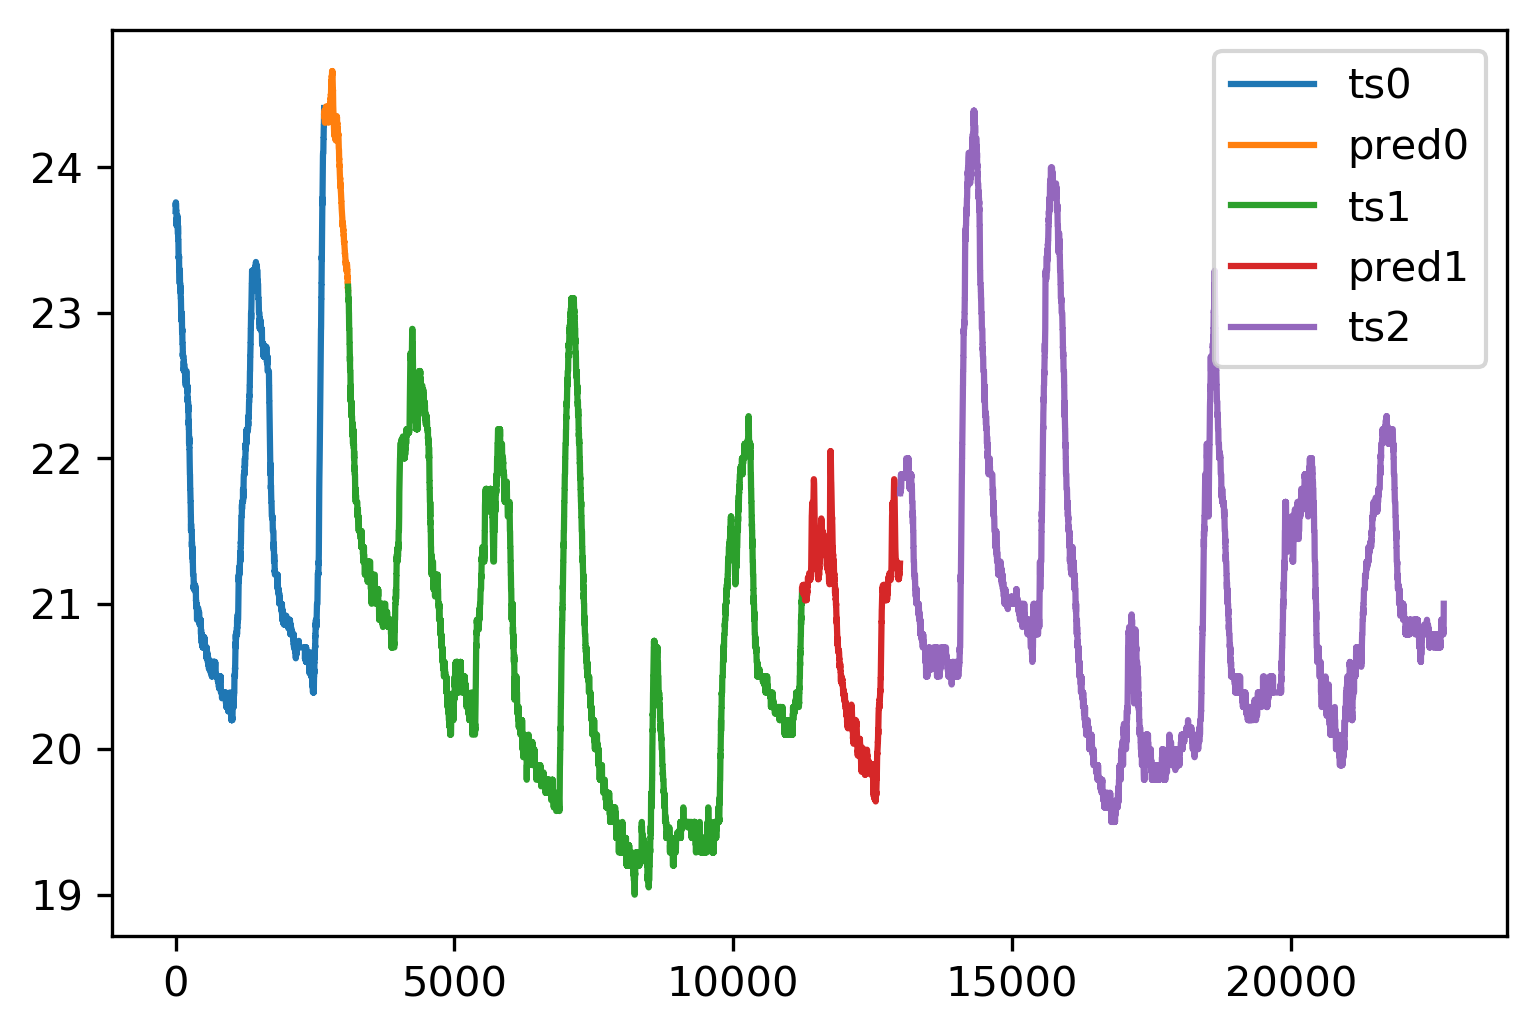

In [64]:
plt.plot(range(len(ts0)), ts0, label='ts0')
plt.plot(range(len(ts0), len(ts0)+len(pred000)), pred000, label='pred0')
plt.plot(range(len(ts0)+len(pred0), len(ts0)+len(pred000)+len(ts1) ), ts1, label='ts1')
plt.plot(range(len(ts0)+len(pred000)+len(ts1), len(ts0)+len(pred000)+len(ts1)+len(pred1)), pred1, label='pred1')
plt.plot(range(len(ts0)+len(pred000)+len(ts1)+len(pred1),len(ts0)+len(pred000)+len(ts1)+len(pred1)+len(ts2) ), ts2, label='ts2')
plt.legend(loc=1)
plt.show()

In [65]:
index = pd.date_range(start=test['date'][0], end=test2['date'][len(test2)-1], freq='min')

ts = np.concatenate((ts0, pred000[1:-1], ts1, pred1[1:-1], ts2))
ts = pd.Series(ts, index)

In [66]:
ts

2015-02-02 14:19:00    23.7000
2015-02-02 14:20:00    23.7180
2015-02-02 14:21:00    23.7300
2015-02-02 14:22:00    23.7225
2015-02-02 14:23:00    23.7540
                        ...   
2015-02-18 09:15:00    20.8150
2015-02-18 09:16:00    20.8650
2015-02-18 09:17:00    20.8900
2015-02-18 09:18:00    20.8900
2015-02-18 09:19:00    21.0000
Freq: T, Length: 22741, dtype: float64

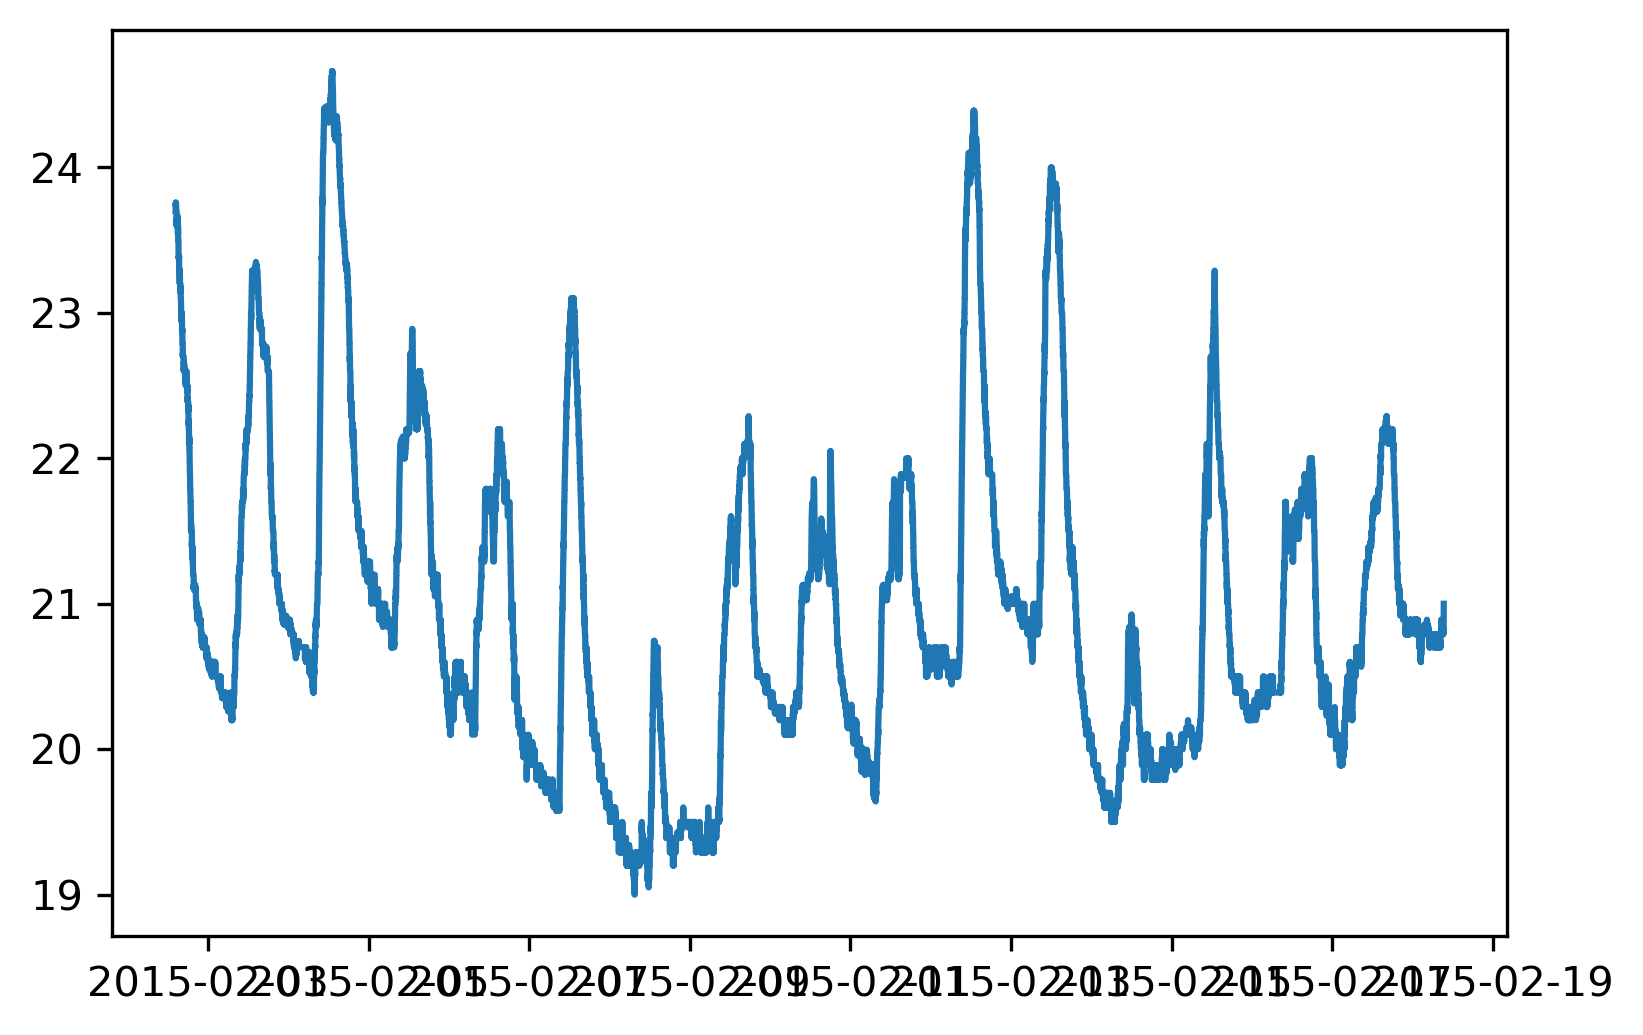

In [67]:
plt.plot(ts)

In [68]:
ts.to_csv(r'/Users/Cava/Desktop/University/Data Science & Business Informatics/Data Mining/Advanced Topics and Applications/Project/data/temperatureTS.csv')